# Notebook 01 : Analyse Exploratoire des Données (EDA)
## Heart Disease Prediction Dataset





## 1. Configuration et Import des Librairies

In [47]:
# ============================================================================
# CONFIGURATION ET IMPORTS
# ============================================================================

# Librairies de base
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr, spearmanr

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Style des graphiques - Professionnel
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Couleurs personnalisées pour le projet
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'success': '#28A745',
    'danger': '#DC3545',
    'warning': '#FFC107',
    'info': '#17A2B8',
    'healthy': '#28A745',
    'disease': '#DC3545'
}

# Palette pour la variable cible
TARGET_PALETTE = [COLORS['healthy'], COLORS['disease']]

print("Configuration terminée avec succès.")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Configuration terminée avec succès.
NumPy version: 2.4.0
Pandas version: 2.3.3


## 2. Chargement des Données

In [48]:
# ============================================================================
# CHARGEMENT DU DATASET
# ============================================================================

# Charger les données
df = pd.read_csv('heart.csv')

# Créer une copie pour les manipulations
df_original = df.copy()

print("Dataset chargé avec succès!")
print(f"Dimensions : {df.shape[0]} lignes x {df.shape[1]} colonnes")

Dataset chargé avec succès!
Dimensions : 1025 lignes x 14 colonnes


In [49]:
# ============================================================================
# DICTIONNAIRE DES VARIABLES
# ============================================================================

# Description détaillée de chaque variable
data_dictionary = {
    'age': {
        'description': 'Âge du patient en années',
        'type': 'Numérique continue',
        'unité': 'Années'
    },
    'sex': {
        'description': 'Sexe du patient',
        'type': 'Catégorielle binaire',
        'valeurs': {0: 'Femme', 1: 'Homme'}
    },
    'cp': {
        'description': 'Type de douleur thoracique (Chest Pain)',
        'type': 'Catégorielle ordinale',
        'valeurs': {
            0: 'Angine typique',
            1: 'Angine atypique',
            2: 'Douleur non-angineuse',
            3: 'Asymptomatique'
        }
    },
    'trestbps': {
        'description': 'Pression artérielle au repos',
        'type': 'Numérique continue',
        'unité': 'mm Hg'
    },
    'chol': {
        'description': 'Cholestérol sérique',
        'type': 'Numérique continue',
        'unité': 'mg/dl'
    },
    'fbs': {
        'description': 'Glycémie à jeun > 120 mg/dl',
        'type': 'Catégorielle binaire',
        'valeurs': {0: 'Faux', 1: 'Vrai'}
    },
    'restecg': {
        'description': 'Résultats électrocardiographiques au repos',
        'type': 'Catégorielle ordinale',
        'valeurs': {
            0: 'Normal',
            1: 'Anomalie onde ST-T',
            2: 'Hypertrophie ventriculaire gauche'
        }
    },
    'thalach': {
        'description': 'Fréquence cardiaque maximale atteinte',
        'type': 'Numérique continue',
        'unité': 'bpm'
    },
    'exang': {
        'description': 'Angine induite par l\'exercice',
        'type': 'Catégorielle binaire',
        'valeurs': {0: 'Non', 1: 'Oui'}
    },
    'oldpeak': {
        'description': 'Dépression ST induite par l\'exercice',
        'type': 'Numérique continue',
        'unité': 'mm'
    },
    'slope': {
        'description': 'Pente du segment ST à l\'effort maximal',
        'type': 'Catégorielle ordinale',
        'valeurs': {
            0: 'Descendante',
            1: 'Plate',
            2: 'Ascendante'
        }
    },
    'ca': {
        'description': 'Nombre de vaisseaux majeurs colorés par fluoroscopie',
        'type': 'Numérique discrète',
        'valeurs': '0 à 4'
    },
    'thal': {
        'description': 'Thalassémie',
        'type': 'Catégorielle ordinale',
        'valeurs': {
            0: 'Normal',
            1: 'Défaut fixé',
            2: 'Défaut réversible',
            3: 'Défaut réversible'
        }
    },
    'target': {
        'description': 'Présence de maladie cardiaque',
        'type': 'Catégorielle binaire (Variable cible)',
        'valeurs': {0: 'Pas de maladie', 1: 'Maladie cardiaque'}
    }
}

# Afficher le dictionnaire sous forme de tableau
dict_df = pd.DataFrame([
    {'Variable': k, 'Description': v['description'], 'Type': v['type']}
    for k, v in data_dictionary.items()
])

print("DICTIONNAIRE DES VARIABLES")
print("=" * 80)
display(dict_df)

DICTIONNAIRE DES VARIABLES


,Variable,Description,Type
0,age,Âge du patient en années,Numérique continue
1,sex,Sexe du patient,Catégorielle binaire
2,cp,Type de douleur thoracique (Chest Pain),Catégorielle ordinale
3,trestbps,Pression artérielle au repos,Numérique continue
4,chol,Cholestérol sérique,Numérique continue
5,fbs,Glycémie à jeun > 120 mg/dl,Catégorielle binaire
6,restecg,Résultats électrocardiographiques au repos,Catégorielle ordinale
7,thalach,Fréquence cardiaque maximale atteinte,Numérique continue
8,exang,Angine induite par l'exercice,Catégorielle binaire
9,oldpeak,Dépression ST induite par l'exercice,Numérique continue


## 3. Première Exploration des Données

In [50]:
# ============================================================================
# APERCU DES DONNEES
# ============================================================================

print("PREMIÈRES LIGNES DU DATASET")
print("=" * 80)
display(df.head(10))

PREMIÈRES LIGNES DU DATASET


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.000,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.400,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.800,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.800,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.200,1,2,2,0


In [51]:
print("\nDERNIÈRES LIGNES DU DATASET")
print("=" * 80)
display(df.tail(10))


DERNIÈRES LIGNES DU DATASET


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.200,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.400,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.000,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.000,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.100,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.000,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.800,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.000,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.000,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.400,1,1,3,0


In [52]:
# ============================================================================
# INFORMATIONS SUR LE DATASET
# ============================================================================

print("INFORMATIONS GÉNÉRALES")
print("=" * 80)
print(f"\nNombre total d'observations : {df.shape[0]}")
print(f"Nombre total de variables : {df.shape[1]}")
print(f"Mémoire utilisée : {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print("\n")
df.info()

INFORMATIONS GÉNÉRALES

Nombre total d'observations : 1025
Nombre total de variables : 14
Mémoire utilisée : 112.24 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [53]:
# ============================================================================
# TYPES DE DONNEES
# ============================================================================

print("\nTYPES DE DONNÉES PAR COLONNE")
print("=" * 80)

types_df = pd.DataFrame({
    'Variable': df.columns,
    'Type': df.dtypes.values,
    'Non-Null': df.count().values,
    'Null': df.isnull().sum().values,
    'Unique': df.nunique().values
})
display(types_df)


TYPES DE DONNÉES PAR COLONNE


,Variable,Type,Non-Null,Null,Unique
0,age,int64,1025,0,41
1,sex,int64,1025,0,2
2,cp,int64,1025,0,4
3,trestbps,int64,1025,0,49
4,chol,int64,1025,0,152
5,fbs,int64,1025,0,2
6,restecg,int64,1025,0,3
7,thalach,int64,1025,0,91
8,exang,int64,1025,0,2
9,oldpeak,float64,1025,0,40


## 4. Analyse des Valeurs Manquantes

In [54]:
# ============================================================================
# ANALYSE DES VALEURS MANQUANTES
# ============================================================================

print("ANALYSE DES VALEURS MANQUANTES")
print("=" * 80)

# Calculer les statistiques de valeurs manquantes
missing_stats = pd.DataFrame({
    'Variable': df.columns,
    'Valeurs Manquantes': df.isnull().sum().values,
    'Pourcentage (%)': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing_stats = missing_stats.sort_values('Valeurs Manquantes', ascending=False)

display(missing_stats)

# Vérification
total_missing = df.isnull().sum().sum()
if total_missing == 0:
    print("\n\u2705 Excellent ! Aucune valeur manquante dans le dataset.")
else:
    print(f"\n\u26a0\ufe0f Attention : {total_missing} valeurs manquantes détectées.")

ANALYSE DES VALEURS MANQUANTES


,Variable,Valeurs Manquantes,Pourcentage (%)
0,age,0,0.000
1,sex,0,0.000
2,cp,0,0.000
3,trestbps,0,0.000
4,chol,0,0.000
5,fbs,0,0.000
6,restecg,0,0.000
7,thalach,0,0.000
8,exang,0,0.000
9,oldpeak,0,0.000



✅ Excellent ! Aucune valeur manquante dans le dataset.


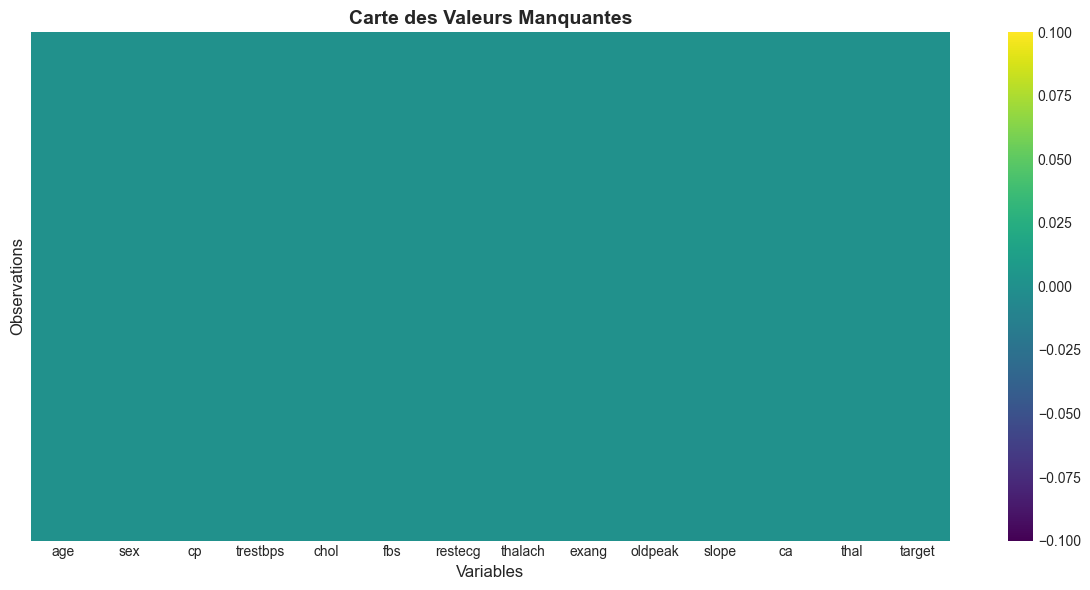

Figure sauvegardée : missing_values_heatmap.png


In [55]:
# ============================================================================
# VISUALISATION DES VALEURS MANQUANTES
# ============================================================================

fig, ax = plt.subplots(figsize=(12, 6))

# Heatmap des valeurs manquantes
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=ax)
ax.set_title('Carte des Valeurs Manquantes', fontsize=14, fontweight='bold')
ax.set_xlabel('Variables', fontsize=12)
ax.set_ylabel('Observations', fontsize=12)

plt.tight_layout()
plt.savefig('images/missing_values_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure sauvegardée : missing_values_heatmap.png")

## 5. Statistiques Descriptives

In [56]:
# ============================================================================
# STATISTIQUES DESCRIPTIVES COMPLÈTES
# ============================================================================

print("STATISTIQUES DESCRIPTIVES")
print("=" * 80)

# Statistiques de base
desc_stats = df.describe().T
desc_stats['median'] = df.median()
desc_stats['mode'] = df.mode().iloc[0]
desc_stats['range'] = desc_stats['max'] - desc_stats['min']
desc_stats['IQR'] = desc_stats['75%'] - desc_stats['25%']
desc_stats['skewness'] = df.skew()
desc_stats['kurtosis'] = df.kurtosis()

# Réorganiser les colonnes
desc_stats = desc_stats[['count', 'mean', 'median', 'mode', 'std', 'min', '25%', '50%', '75%', 'max', 'range', 'IQR', 'skewness', 'kurtosis']]

display(desc_stats.round(3))

STATISTIQUES DESCRIPTIVES


,count,mean,median,mode,std,min,25%,50%,75%,max,range,IQR,skewness,kurtosis
age,1025.000,54.434,56.000,58.000,9.072,29.000,48.000,56.000,61.000,77.000,48.000,13.000,-0.249,-0.526
sex,1025.000,0.696,1.000,1.000,0.460,0.000,0.000,1.000,1.000,1.000,1.000,1.000,-0.851,-1.278
cp,1025.000,0.942,1.000,0.000,1.030,0.000,0.000,1.000,2.000,3.000,3.000,2.000,0.529,-1.149
trestbps,1025.000,131.612,130.000,120.000,17.517,94.000,120.000,130.000,140.000,200.000,106.000,20.000,0.740,0.991
chol,1025.000,246.000,240.000,204.000,51.593,126.000,211.000,240.000,275.000,564.000,438.000,64.000,1.074,3.997
fbs,1025.000,0.149,0.000,0.000,0.357,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.971,1.890
restecg,1025.000,0.530,1.000,1.000,0.528,0.000,0.000,1.000,1.000,2.000,2.000,1.000,0.180,-1.310
thalach,1025.000,149.114,152.000,162.000,23.006,71.000,132.000,152.000,166.000,202.000,131.000,34.000,-0.514,-0.089
exang,1025.000,0.337,0.000,0.000,0.473,0.000,0.000,0.000,1.000,1.000,1.000,1.000,0.693,-1.523
oldpeak,1025.000,1.072,0.800,0.000,1.175,0.000,0.000,0.800,1.800,6.200,6.200,1.800,1.211,1.314


In [57]:
# ============================================================================
# INTERPRÉTATION DES STATISTIQUES
# ============================================================================

print("\nINTERPRÉTATION DES STATISTIQUES CLÉS")
print("=" * 80)

interpretations = []

for col in df.columns:
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    
    # Interprétation de l'asymétrie
    if abs(skew) < 0.5:
        skew_interp = "Symétrique"
    elif skew > 0:
        skew_interp = "Asymétrie positive (queue à droite)"
    else:
        skew_interp = "Asymétrie négative (queue à gauche)"
    
    # Interprétation de l'aplatissement
    if abs(kurt) < 0.5:
        kurt_interp = "Mésokurtique (normale)"
    elif kurt > 0:
        kurt_interp = "Leptokurtique (pics)"
    else:
        kurt_interp = "Platykurtique (aplatie)"
    
    interpretations.append({
        'Variable': col,
        'Skewness': round(skew, 3),
        'Interprétation Skew': skew_interp,
        'Kurtosis': round(kurt, 3),
        'Interprétation Kurt': kurt_interp
    })

interp_df = pd.DataFrame(interpretations)
display(interp_df)


INTERPRÉTATION DES STATISTIQUES CLÉS


,Variable,Skewness,Interprétation Skew,Kurtosis,Interprétation Kurt
0,age,-0.249,Symétrique,-0.526,Platykurtique (aplatie)
1,sex,-0.851,Asymétrie négative (queue à gauche),-1.278,Platykurtique (aplatie)
2,cp,0.529,Asymétrie positive (queue à droite),-1.149,Platykurtique (aplatie)
3,trestbps,0.740,Asymétrie positive (queue à droite),0.991,Leptokurtique (pics)
4,chol,1.074,Asymétrie positive (queue à droite),3.997,Leptokurtique (pics)
5,fbs,1.971,Asymétrie positive (queue à droite),1.890,Leptokurtique (pics)
6,restecg,0.180,Symétrique,-1.310,Platykurtique (aplatie)
7,thalach,-0.514,Asymétrie négative (queue à gauche),-0.089,Mésokurtique (normale)
8,exang,0.693,Asymétrie positive (queue à droite),-1.523,Platykurtique (aplatie)
9,oldpeak,1.211,Asymétrie positive (queue à droite),1.314,Leptokurtique (pics)


## 6. Analyse de la Variable Cible

In [58]:
# ============================================================================
# DISTRIBUTION DE LA VARIABLE CIBLE
# ============================================================================

print("ANALYSE DE LA VARIABLE CIBLE (target)")
print("=" * 80)

# Comptage des classes
target_counts = df['target'].value_counts()
target_percentages = df['target'].value_counts(normalize=True) * 100

target_summary = pd.DataFrame({
    'Classe': ['Pas de maladie (0)', 'Maladie cardiaque (1)'],
    'Effectif': target_counts.values,
    'Pourcentage (%)': target_percentages.values.round(2)
})

display(target_summary)

# Vérifier l'équilibre des classes
ratio = target_counts.min() / target_counts.max()
if ratio > 0.8:
    print(f"\n\u2705 Classes relativement équilibrées (ratio: {ratio:.2f})")
elif ratio > 0.5:
    print(f"\n\u26a0\ufe0f Léger déséquilibre des classes (ratio: {ratio:.2f})")
else:
    print(f"\n\u274c Déséquilibre significatif des classes (ratio: {ratio:.2f})")

ANALYSE DE LA VARIABLE CIBLE (target)


,Classe,Effectif,Pourcentage (%)
0,Pas de maladie (0),526,51.320
1,Maladie cardiaque (1),499,48.680



✅ Classes relativement équilibrées (ratio: 0.95)


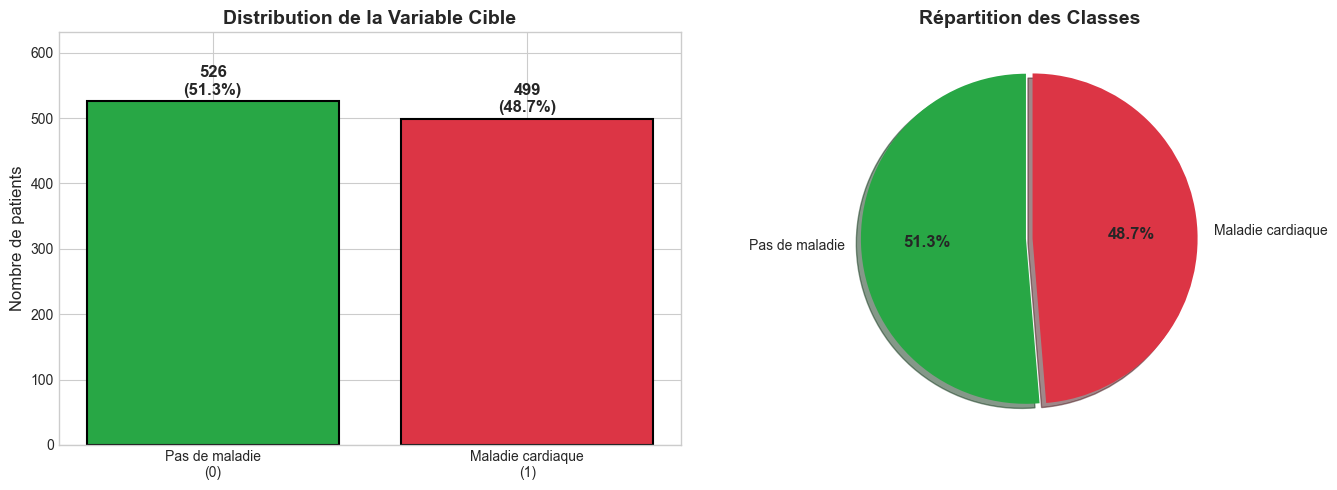

Figure sauvegardée : target_distribution.png


In [59]:
# ============================================================================
# VISUALISATION DE LA VARIABLE CIBLE
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1 : Bar plot
ax1 = axes[0]
bars = ax1.bar(['Pas de maladie\n(0)', 'Maladie cardiaque\n(1)'], 
               target_counts.values, 
               color=TARGET_PALETTE,
               edgecolor='black',
               linewidth=1.5)

# Ajouter les valeurs sur les barres
for bar, count, pct in zip(bars, target_counts.values, target_percentages.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count}\n({pct:.1f}%)', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

ax1.set_title('Distribution de la Variable Cible', fontsize=14, fontweight='bold')
ax1.set_ylabel('Nombre de patients', fontsize=12)
ax1.set_ylim(0, max(target_counts.values) * 1.2)

# Graphique 2 : Pie chart
ax2 = axes[1]
wedges, texts, autotexts = ax2.pie(target_counts.values, 
                                    labels=['Pas de maladie', 'Maladie cardiaque'],
                                    colors=TARGET_PALETTE,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    explode=(0.02, 0.02),
                                    shadow=True)

# Personnaliser le texte
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

ax2.set_title('Répartition des Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('images/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure sauvegardée : target_distribution.png")

## 7. Analyse Univariée

In [60]:
# ============================================================================
# SÉPARATION DES VARIABLES
# ============================================================================

# Variables numériques continues
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Variables catégorielles
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

print(f"Variables numériques continues : {numerical_cols}")
print(f"Variables catégorielles : {categorical_cols}")

Variables numériques continues : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Variables catégorielles : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


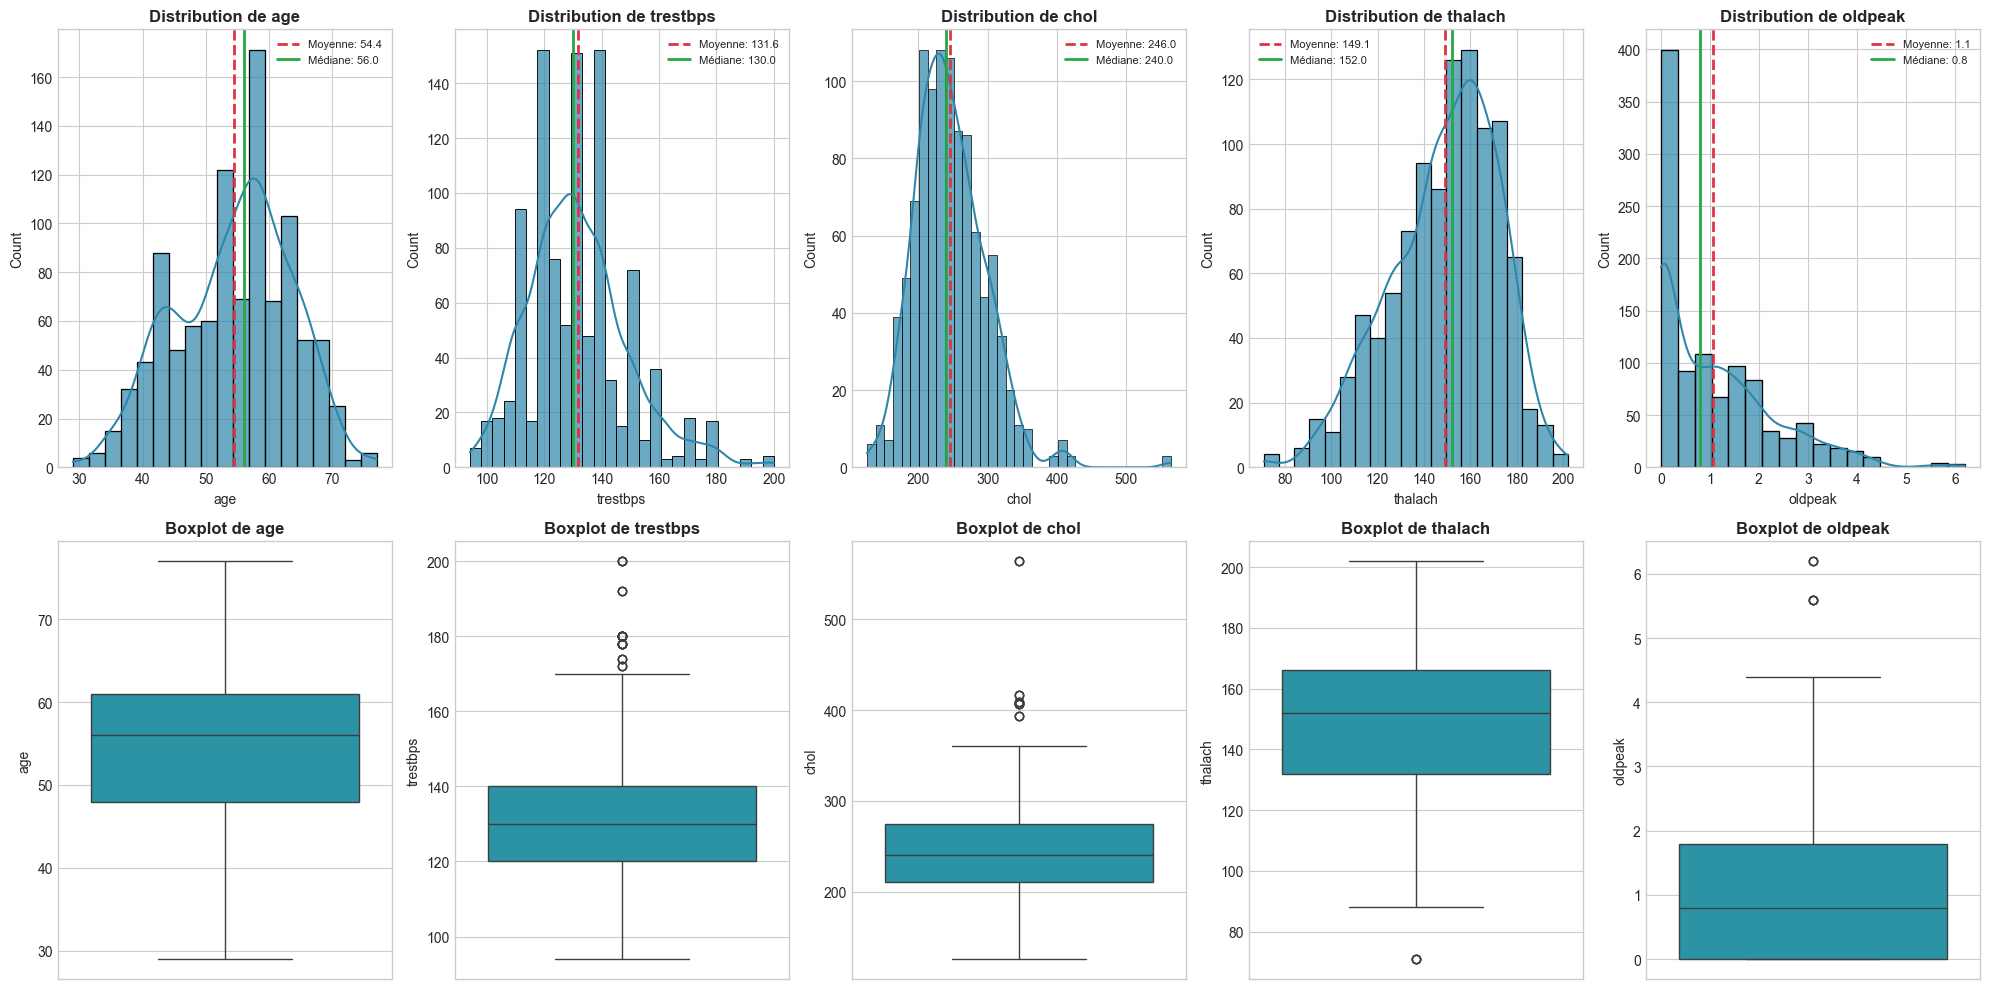

Figure sauvegardée : numerical_distributions.png


In [61]:
# ============================================================================
# DISTRIBUTION DES VARIABLES NUMÉRIQUES
# ============================================================================

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    # Histogramme avec KDE
    ax = axes[idx]
    sns.histplot(data=df, x=col, kde=True, ax=ax, color=COLORS['primary'], 
                 edgecolor='black', alpha=0.7)
    
    # Ajouter ligne pour la moyenne et médiane
    ax.axvline(df[col].mean(), color=COLORS['danger'], linestyle='--', 
               label=f'Moyenne: {df[col].mean():.1f}', linewidth=2)
    ax.axvline(df[col].median(), color=COLORS['success'], linestyle='-', 
               label=f'Médiane: {df[col].median():.1f}', linewidth=2)
    
    ax.set_title(f'Distribution de {col}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=8)
    
for idx, col in enumerate(numerical_cols):
    # Boxplot
    ax = axes[idx + 5]
    sns.boxplot(data=df, y=col, ax=ax, color=COLORS['info'])
    ax.set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('images/numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure sauvegardée : numerical_distributions.png")

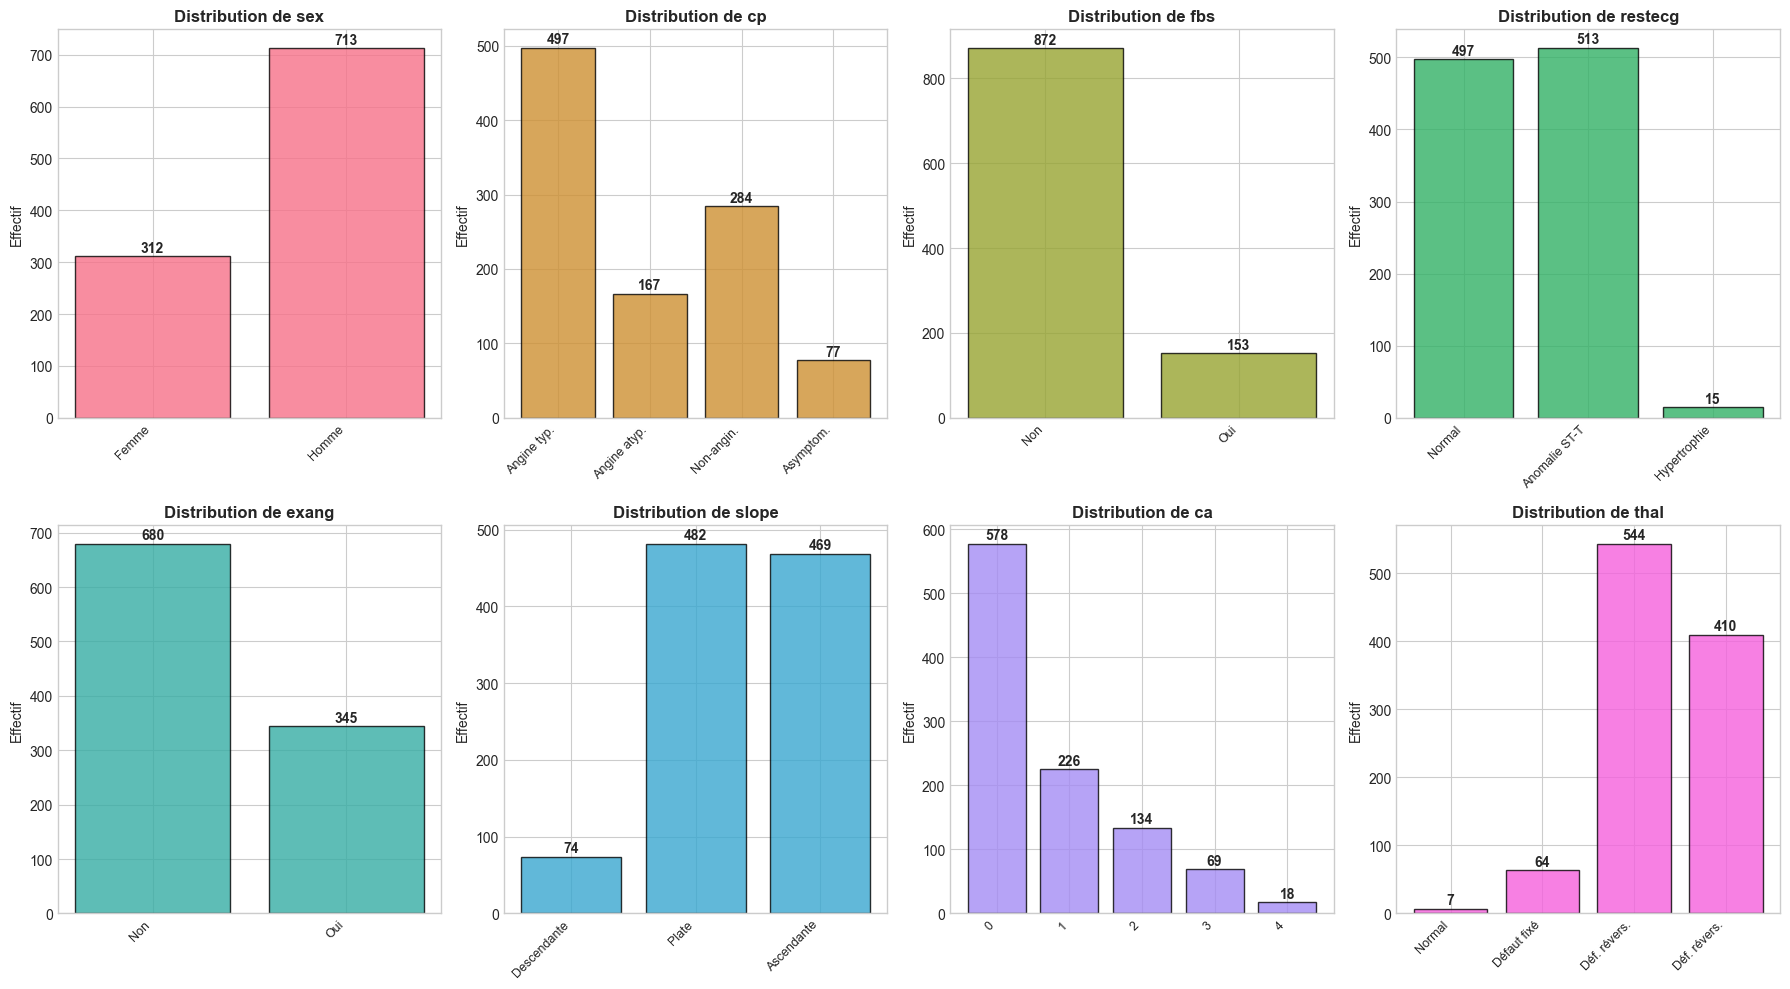

Figure sauvegardée : categorical_distributions.png


In [62]:
# ============================================================================
# DISTRIBUTION DES VARIABLES CATÉGORIELLES
# ============================================================================

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

# Labels pour les variables catégorielles
cat_labels = {
    'sex': {0: 'Femme', 1: 'Homme'},
    'cp': {0: 'Angine typ.', 1: 'Angine atyp.', 2: 'Non-angin.', 3: 'Asymptom.'},
    'fbs': {0: 'Non', 1: 'Oui'},
    'restecg': {0: 'Normal', 1: 'Anomalie ST-T', 2: 'Hypertrophie'},
    'exang': {0: 'Non', 1: 'Oui'},
    'slope': {0: 'Descendante', 1: 'Plate', 2: 'Ascendante'},
    'ca': {0: '0', 1: '1', 2: '2', 3: '3', 4: '4'},
    'thal': {0: 'Normal', 1: 'Défaut fixé', 2: 'Déf. révers.', 3: 'Déf. révers.'}
}

colors_palette = sns.color_palette("husl", 8)

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    
    # Compter les valeurs
    value_counts = df[col].value_counts().sort_index()
    
    # Créer les labels
    if col in cat_labels:
        labels = [cat_labels[col].get(i, str(i)) for i in value_counts.index]
    else:
        labels = value_counts.index.astype(str)
    
    # Bar plot
    bars = ax.bar(range(len(value_counts)), value_counts.values, 
                  color=colors_palette[idx], edgecolor='black', alpha=0.8)
    
    # Ajouter les valeurs
    for bar, val in zip(bars, value_counts.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                f'{val}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
    ax.set_title(f'Distribution de {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Effectif')

plt.tight_layout()
plt.savefig('images/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure sauvegardée : categorical_distributions.png")

## 8. Détection des Valeurs Aberrantes (Outliers)

In [63]:
# ============================================================================
# DÉTECTION DES OUTLIERS AVEC LA MÉTHODE IQR
# ============================================================================

print("DÉTECTION DES VALEURS ABERRANTES (Méthode IQR)")
print("=" * 80)

def detect_outliers_iqr(data, column):
    """Détecte les outliers en utilisant la méthode IQR."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Borne inférieure': lower_bound,
        'Borne supérieure': upper_bound,
        'Nombre outliers': len(outliers),
        'Pourcentage (%)': round(len(outliers) / len(data) * 100, 2)
    }

# Analyser chaque variable numérique
outlier_results = []
for col in numerical_cols:
    result = detect_outliers_iqr(df, col)
    result['Variable'] = col
    outlier_results.append(result)

outlier_df = pd.DataFrame(outlier_results)
outlier_df = outlier_df[['Variable', 'Q1', 'Q3', 'IQR', 'Borne inférieure', 
                         'Borne supérieure', 'Nombre outliers', 'Pourcentage (%)']]

display(outlier_df.round(2))

DÉTECTION DES VALEURS ABERRANTES (Méthode IQR)


,Variable,Q1,Q3,IQR,Borne inférieure,Borne supérieure,Nombre outliers,Pourcentage (%)
0,age,48.000,61.000,13.000,28.500,80.500,0,0.000
1,trestbps,120.000,140.000,20.000,90.000,170.000,30,2.930
2,chol,211.000,275.000,64.000,115.000,371.000,16,1.560
3,thalach,132.000,166.000,34.000,81.000,217.000,4,0.390
4,oldpeak,0.000,1.800,1.800,-2.700,4.500,7,0.680


In [64]:
# ============================================================================
# DÉTECTION DES OUTLIERS AVEC Z-SCORE
# ============================================================================

print("\nDÉTECTION DES VALEURS ABERRANTES (Méthode Z-Score)")
print("=" * 80)

def detect_outliers_zscore(data, column, threshold=3):
    """Détecte les outliers en utilisant le Z-score."""
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    
    return {
        'Variable': column,
        'Moyenne': data[column].mean(),
        'Écart-type': data[column].std(),
        'Seuil Z': threshold,
        'Nombre outliers': len(outliers),
        'Pourcentage (%)': round(len(outliers) / len(data) * 100, 2)
    }

zscore_results = [detect_outliers_zscore(df, col) for col in numerical_cols]
zscore_df = pd.DataFrame(zscore_results)

display(zscore_df.round(2))


DÉTECTION DES VALEURS ABERRANTES (Méthode Z-Score)


,Variable,Moyenne,Écart-type,Seuil Z,Nombre outliers,Pourcentage (%)
0,age,54.430,9.070,3,0,0.000
1,trestbps,131.610,17.520,3,7,0.680
2,chol,246.000,51.590,3,13,1.270
3,thalach,149.110,23.010,3,4,0.390
4,oldpeak,1.070,1.180,3,7,0.680


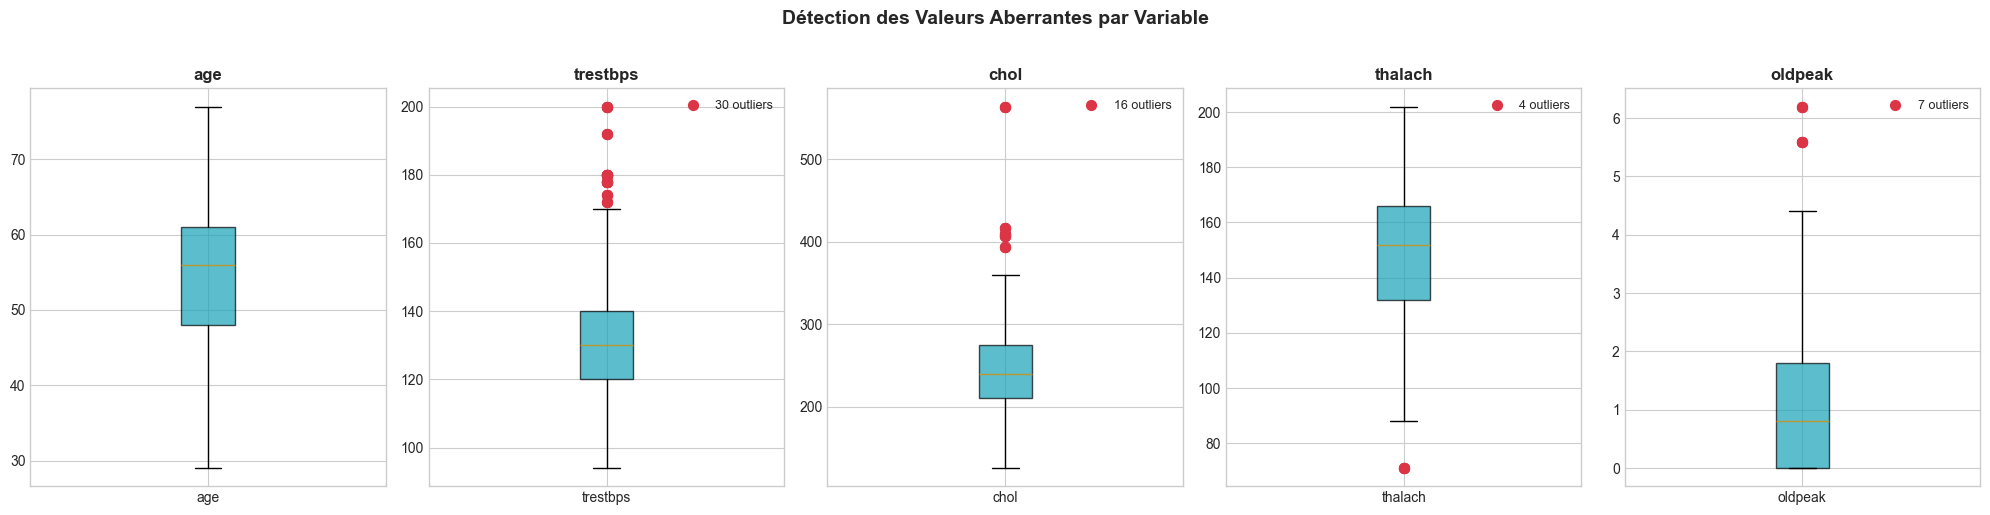

Figure sauvegardée : outliers_detection.png


In [65]:
# ============================================================================
# VISUALISATION DES OUTLIERS
# ============================================================================

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Boxplot avec points
    box = ax.boxplot(df[col], patch_artist=True)
    box['boxes'][0].set_facecolor(COLORS['info'])
    box['boxes'][0].set_alpha(0.7)
    
    # Identifier les outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
    
    # Marquer les outliers en rouge
    if len(outliers) > 0:
        ax.scatter([1]*len(outliers), outliers, color=COLORS['danger'], 
                   s=50, zorder=5, label=f'{len(outliers)} outliers')
        ax.legend(loc='upper right', fontsize=9)
    
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xticklabels([col])

plt.suptitle('Détection des Valeurs Aberrantes par Variable', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('images/outliers_detection.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure sauvegardée : outliers_detection.png")

## 9. Analyse Bivariée - Corrélations

In [66]:
# ============================================================================
# MATRICE DE CORRÉLATION
# ============================================================================

print("ANALYSE DES CORRÉLATIONS")
print("=" * 80)

# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Afficher la matrice
print("\nMatrice de corrélation (Pearson) :")
display(correlation_matrix.round(3))

ANALYSE DES CORRÉLATIONS

Matrice de corrélation (Pearson) :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.103,-0.072,0.271,0.220,0.121,-0.133,-0.390,0.088,0.208,-0.169,0.272,0.072,-0.229
sex,-0.103,1.000,-0.041,-0.079,-0.198,0.027,-0.055,-0.049,0.139,0.085,-0.027,0.112,0.198,-0.280
cp,-0.072,-0.041,1.000,0.038,-0.082,0.079,0.044,0.307,-0.402,-0.175,0.132,-0.176,-0.163,0.435
trestbps,0.271,-0.079,0.038,1.000,0.128,0.182,-0.124,-0.039,0.061,0.187,-0.120,0.105,0.059,-0.139
chol,0.220,-0.198,-0.082,0.128,1.000,0.027,-0.147,-0.022,0.067,0.065,-0.014,0.074,0.100,-0.100
fbs,0.121,0.027,0.079,0.182,0.027,1.000,-0.104,-0.009,0.049,0.011,-0.062,0.137,-0.042,-0.041
restecg,-0.133,-0.055,0.044,-0.124,-0.147,-0.104,1.000,0.048,-0.066,-0.050,0.086,-0.078,-0.021,0.134
thalach,-0.390,-0.049,0.307,-0.039,-0.022,-0.009,0.048,1.000,-0.380,-0.350,0.395,-0.208,-0.098,0.423
exang,0.088,0.139,-0.402,0.061,0.067,0.049,-0.066,-0.380,1.000,0.311,-0.267,0.108,0.197,-0.438
oldpeak,0.208,0.085,-0.175,0.187,0.065,0.011,-0.050,-0.350,0.311,1.000,-0.575,0.222,0.203,-0.438


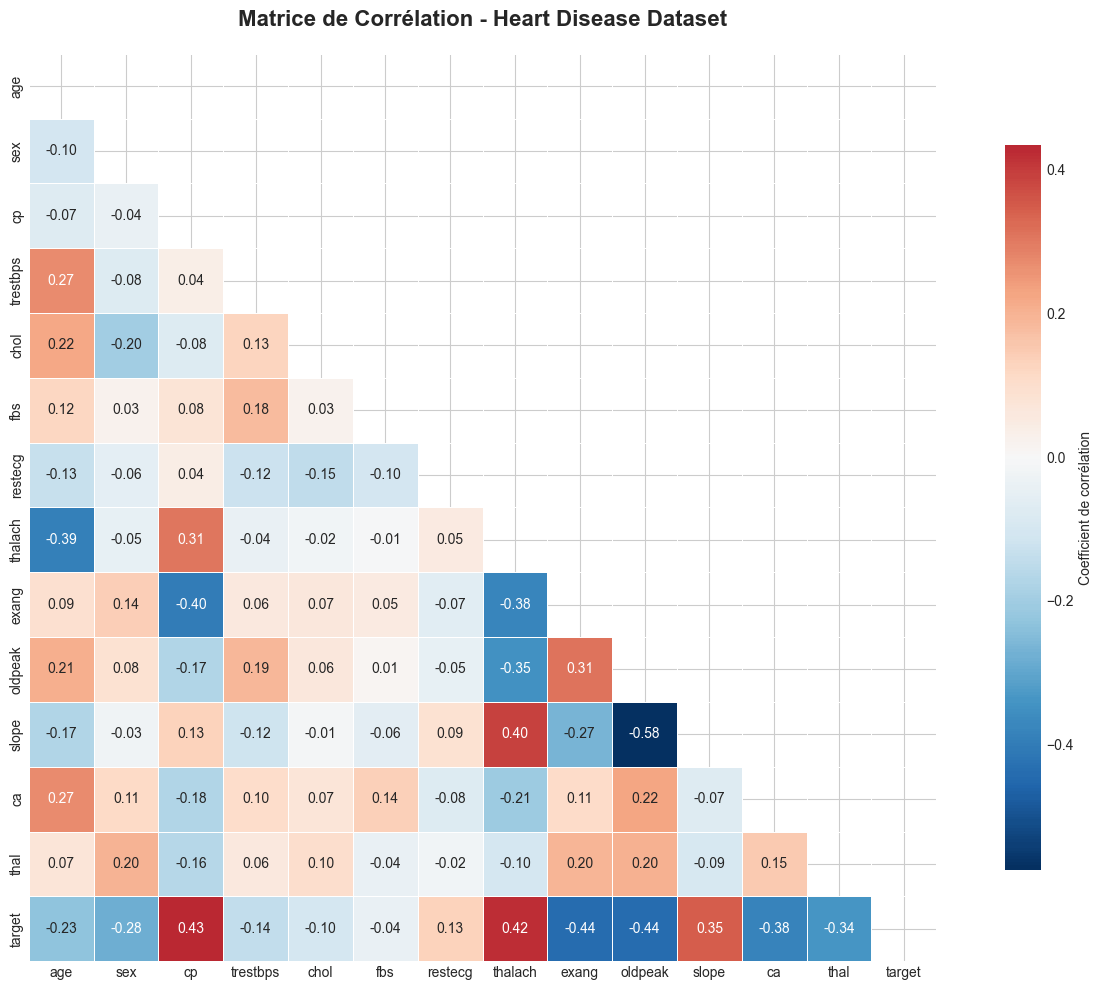

Figure sauvegardée : correlation_matrix.png


In [67]:
# ============================================================================
# HEATMAP DE CORRÉLATION
# ============================================================================

fig, ax = plt.subplots(figsize=(14, 10))

# Créer le masque pour le triangle supérieur
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f',
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Coefficient de corrélation"},
            annot_kws={"size": 10},
            ax=ax)

ax.set_title('Matrice de Corrélation - Heart Disease Dataset', 
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('images/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure sauvegardée : correlation_matrix.png")

In [68]:
# ============================================================================
# CORRÉLATIONS AVEC LA VARIABLE CIBLE
# ============================================================================

print("\nCORRÉLATIONS AVEC LA VARIABLE CIBLE (target)")
print("=" * 80)

# Extraire les corrélations avec target
target_corr = correlation_matrix['target'].drop('target').sort_values(key=abs, ascending=False)

# Créer un DataFrame pour l'affichage
target_corr_df = pd.DataFrame({
    'Variable': target_corr.index,
    'Corrélation': target_corr.values,
    'Corrélation Absolue': abs(target_corr.values),
    'Force': pd.cut(abs(target_corr.values), 
                    bins=[0, 0.1, 0.3, 0.5, 0.7, 1.0],
                    labels=['Très faible', 'Faible', 'Modérée', 'Forte', 'Très forte'])
})

display(target_corr_df.round(3))


CORRÉLATIONS AVEC LA VARIABLE CIBLE (target)


,Variable,Corrélation,Corrélation Absolue,Force
0,oldpeak,-0.438,0.438,Modérée
1,exang,-0.438,0.438,Modérée
2,cp,0.435,0.435,Modérée
3,thalach,0.423,0.423,Modérée
4,ca,-0.382,0.382,Modérée
5,slope,0.346,0.346,Modérée
6,thal,-0.338,0.338,Modérée
7,sex,-0.280,0.280,Faible
8,age,-0.229,0.229,Faible
9,trestbps,-0.139,0.139,Faible


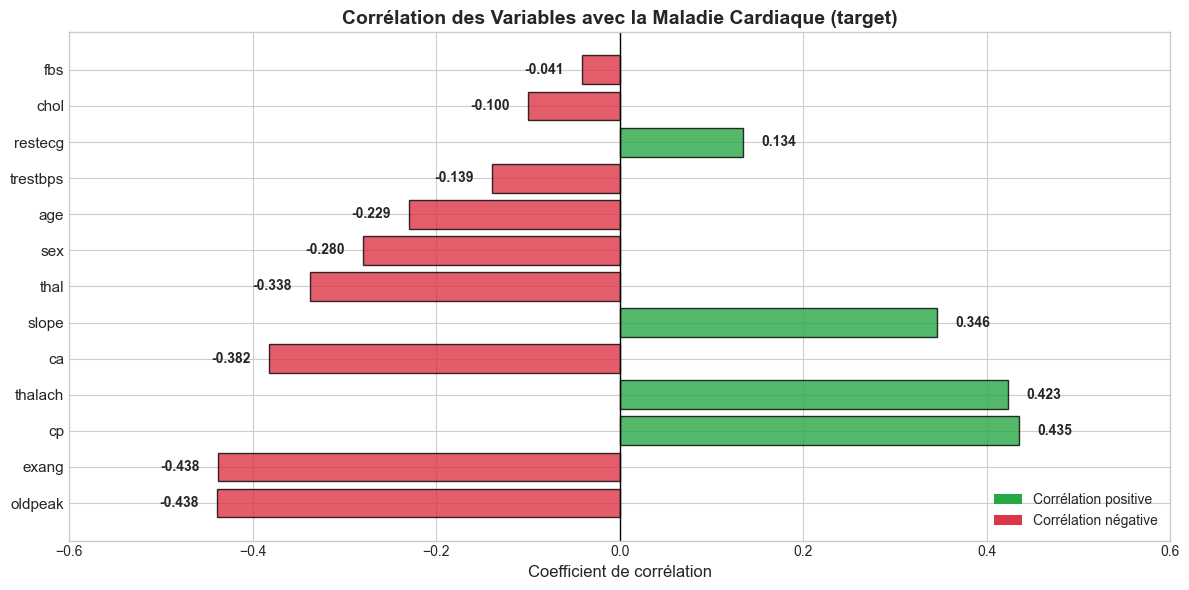

Figure sauvegardée : target_correlations.png


In [69]:
# ============================================================================
# VISUALISATION DES CORRÉLATIONS AVEC TARGET
# ============================================================================

fig, ax = plt.subplots(figsize=(12, 6))

# Couleurs selon le signe de la corrélation
colors = [COLORS['success'] if x > 0 else COLORS['danger'] for x in target_corr.values]

# Bar plot horizontal
bars = ax.barh(range(len(target_corr)), target_corr.values, color=colors, 
               edgecolor='black', alpha=0.8)

# Ajouter les valeurs
for bar, val in zip(bars, target_corr.values):
    x_pos = val + 0.02 if val > 0 else val - 0.02
    ha = 'left' if val > 0 else 'right'
    ax.text(x_pos, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
            ha=ha, va='center', fontsize=10, fontweight='bold')

ax.set_yticks(range(len(target_corr)))
ax.set_yticklabels(target_corr.index, fontsize=11)
ax.set_xlabel('Coefficient de corrélation', fontsize=12)
ax.set_title('Corrélation des Variables avec la Maladie Cardiaque (target)', 
             fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linewidth=1)
ax.set_xlim(-0.6, 0.6)

# Légende
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=COLORS['success'], label='Corrélation positive'),
                   Patch(facecolor=COLORS['danger'], label='Corrélation négative')]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.savefig('images/target_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure sauvegardée : target_correlations.png")

## 10. Analyse par Rapport à la Variable Cible

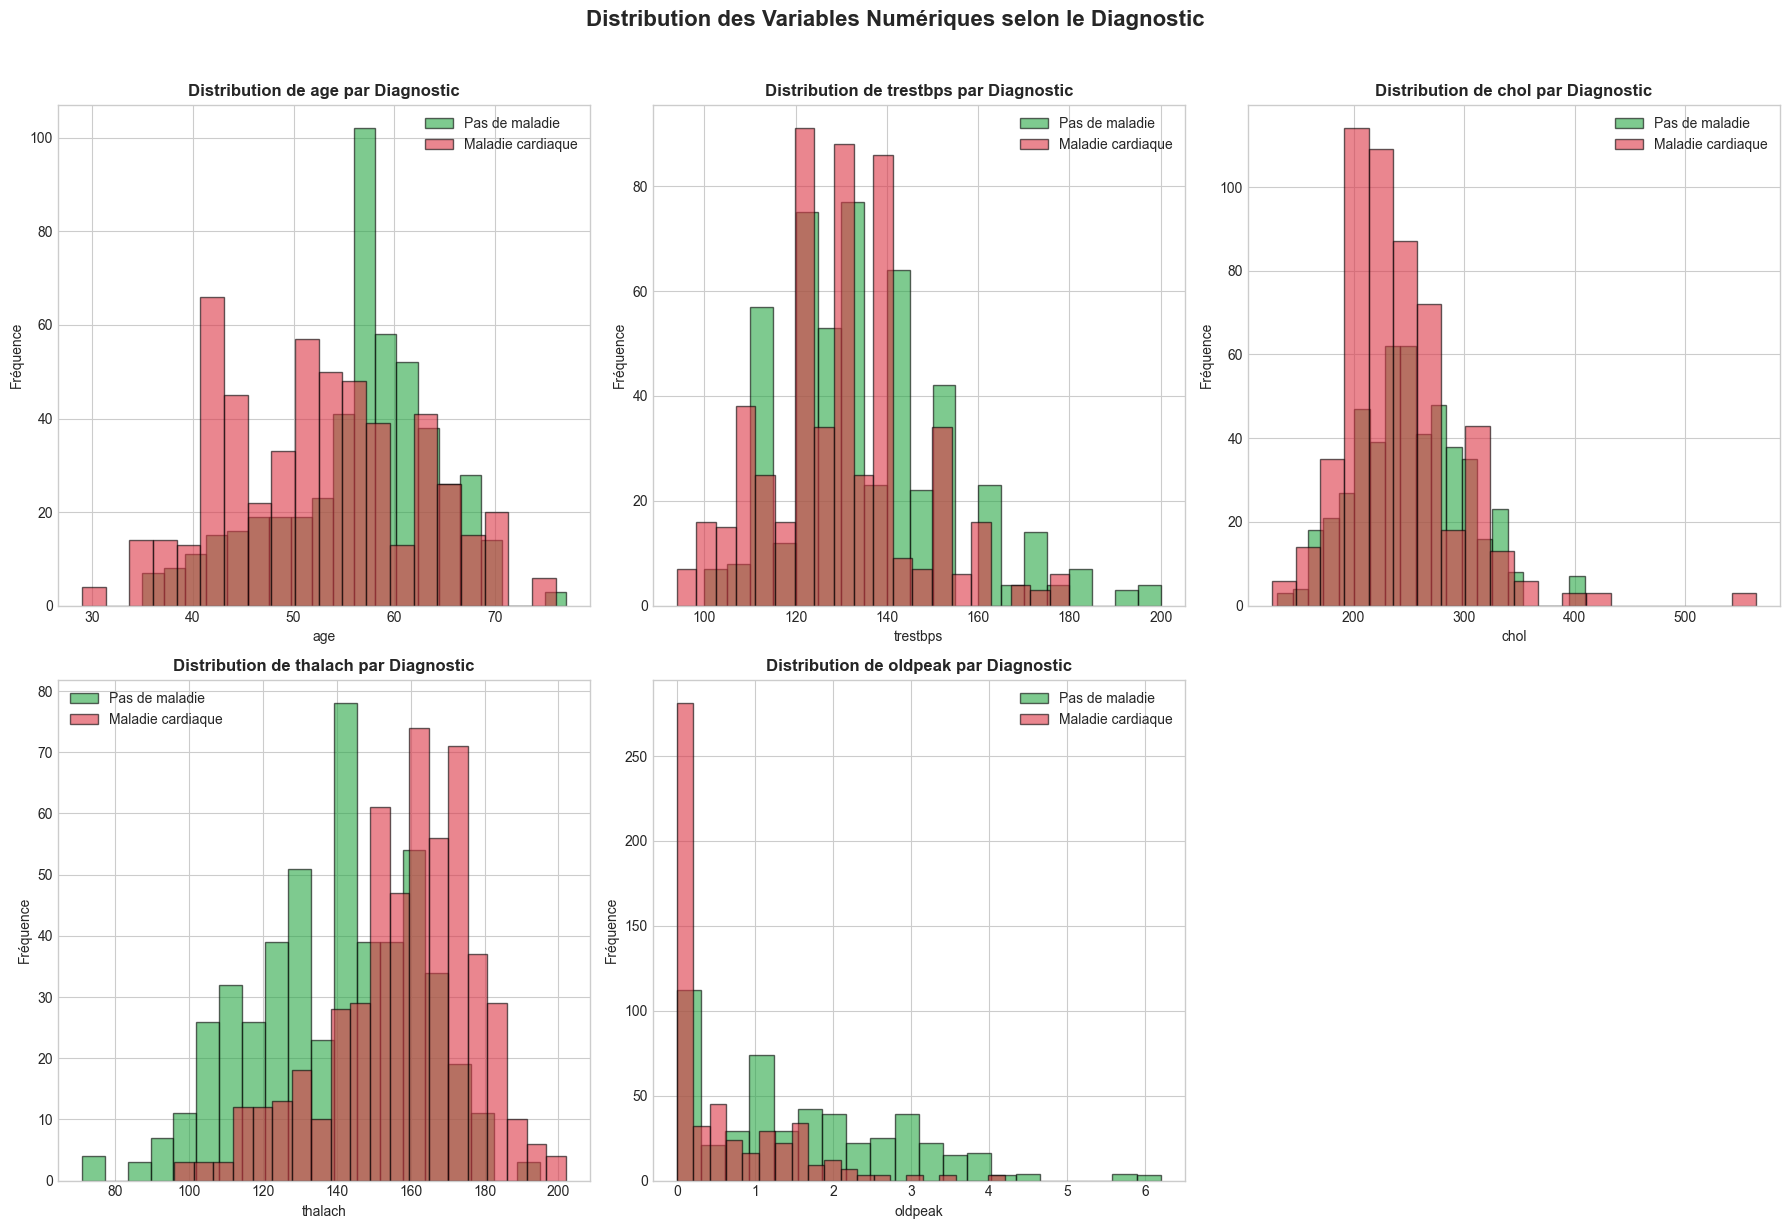

Figure sauvegardée : numerical_by_target.png


In [70]:
# ============================================================================
# DISTRIBUTION DES VARIABLES NUMÉRIQUES PAR CLASSE
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Histogramme par classe
    for target_val, color, label in [(0, COLORS['healthy'], 'Pas de maladie'), 
                                      (1, COLORS['disease'], 'Maladie cardiaque')]:
        data = df[df['target'] == target_val][col]
        ax.hist(data, bins=20, alpha=0.6, color=color, label=label, edgecolor='black')
    
    ax.set_title(f'Distribution de {col} par Diagnostic', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Fréquence')
    ax.legend()

# Supprimer le dernier subplot vide
axes[5].axis('off')

plt.suptitle('Distribution des Variables Numériques selon le Diagnostic', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('images/numerical_by_target.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure sauvegardée : numerical_by_target.png")

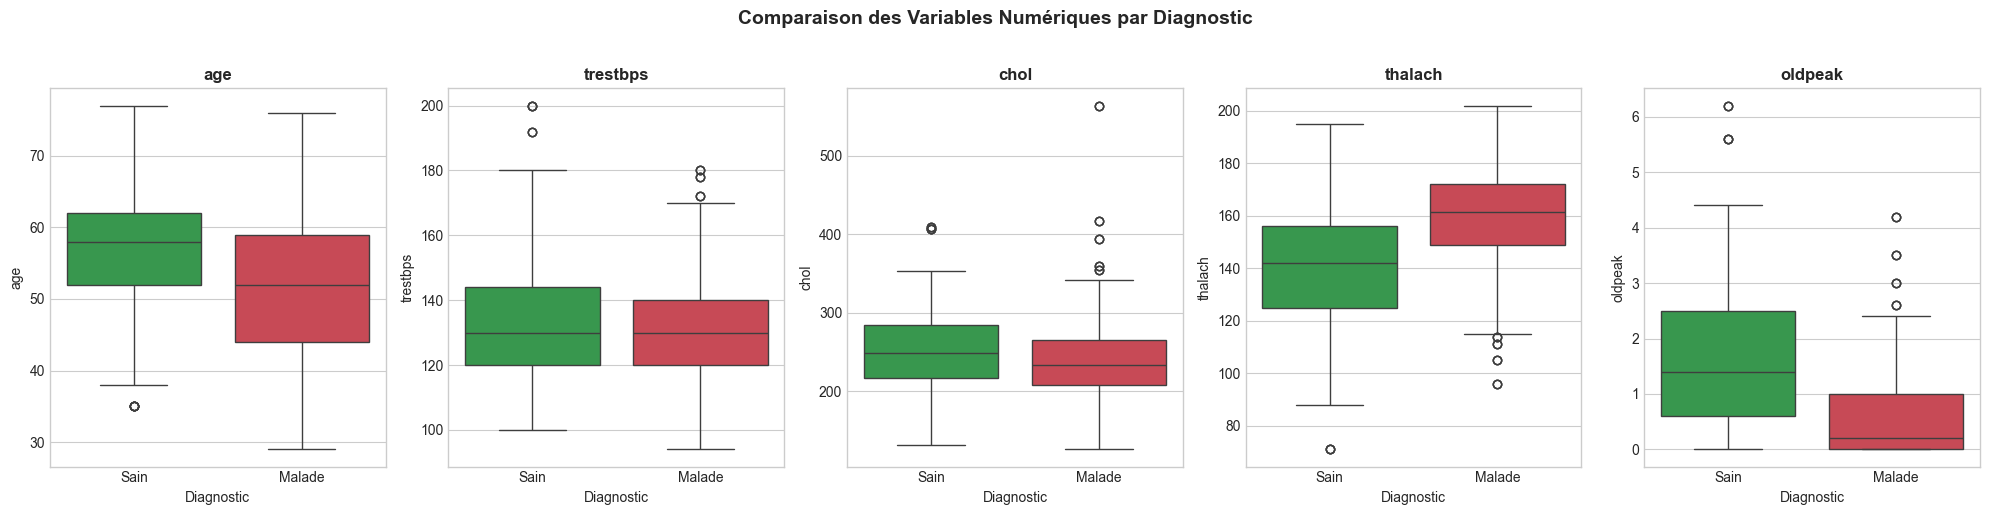

Figure sauvegardée : boxplots_by_target.png


In [71]:
# ============================================================================
# BOXPLOTS PAR CLASSE
# ============================================================================

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    sns.boxplot(data=df, x='target', y=col, ax=ax, palette=TARGET_PALETTE)
    
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Diagnostic')
    ax.set_xticklabels(['Sain', 'Malade'])

plt.suptitle('Comparaison des Variables Numériques par Diagnostic', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('images/boxplots_by_target.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure sauvegardée : boxplots_by_target.png")

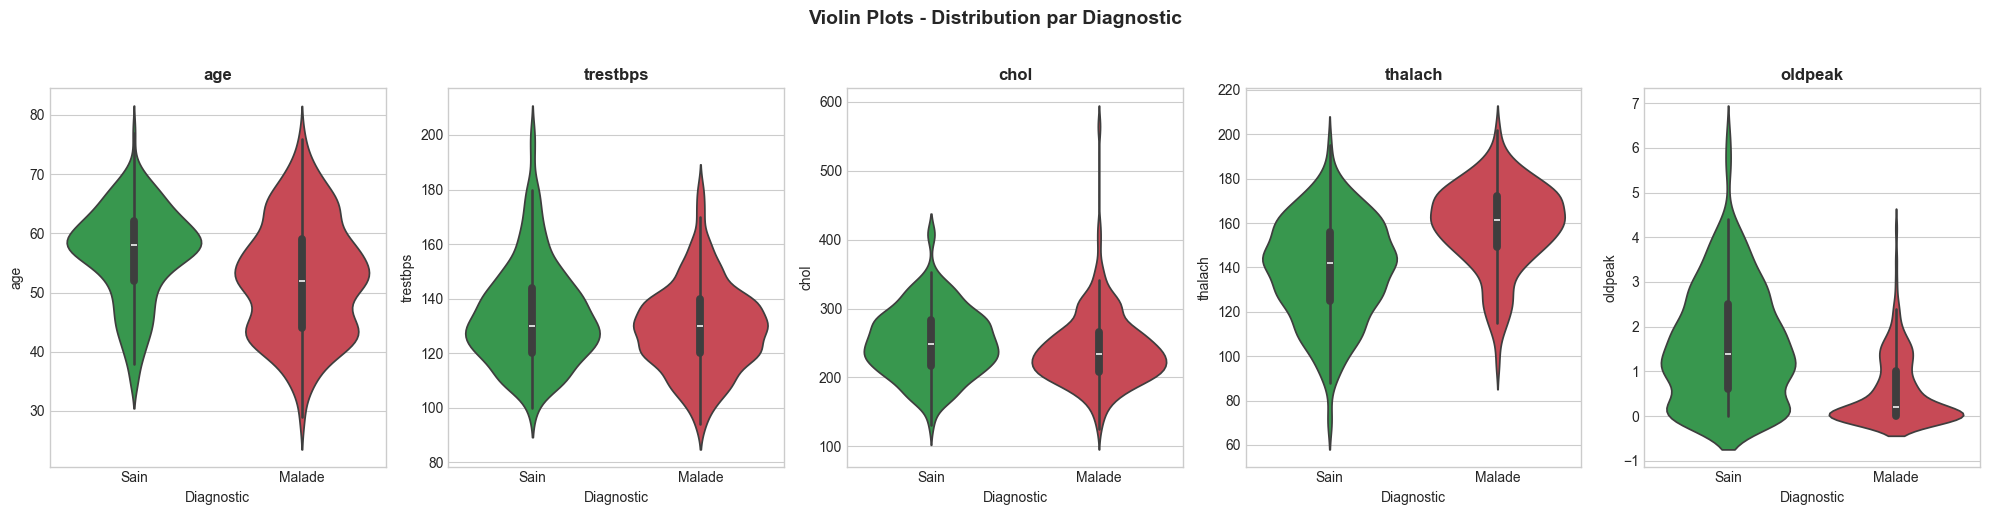

Figure sauvegardée : violin_plots.png


In [72]:
# ============================================================================
# VIOLIN PLOTS
# ============================================================================

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    sns.violinplot(data=df, x='target', y=col, ax=ax, palette=TARGET_PALETTE, inner='box')
    
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Diagnostic')
    ax.set_xticklabels(['Sain', 'Malade'])

plt.suptitle('Violin Plots - Distribution par Diagnostic', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('images/violin_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure sauvegardée : violin_plots.png")

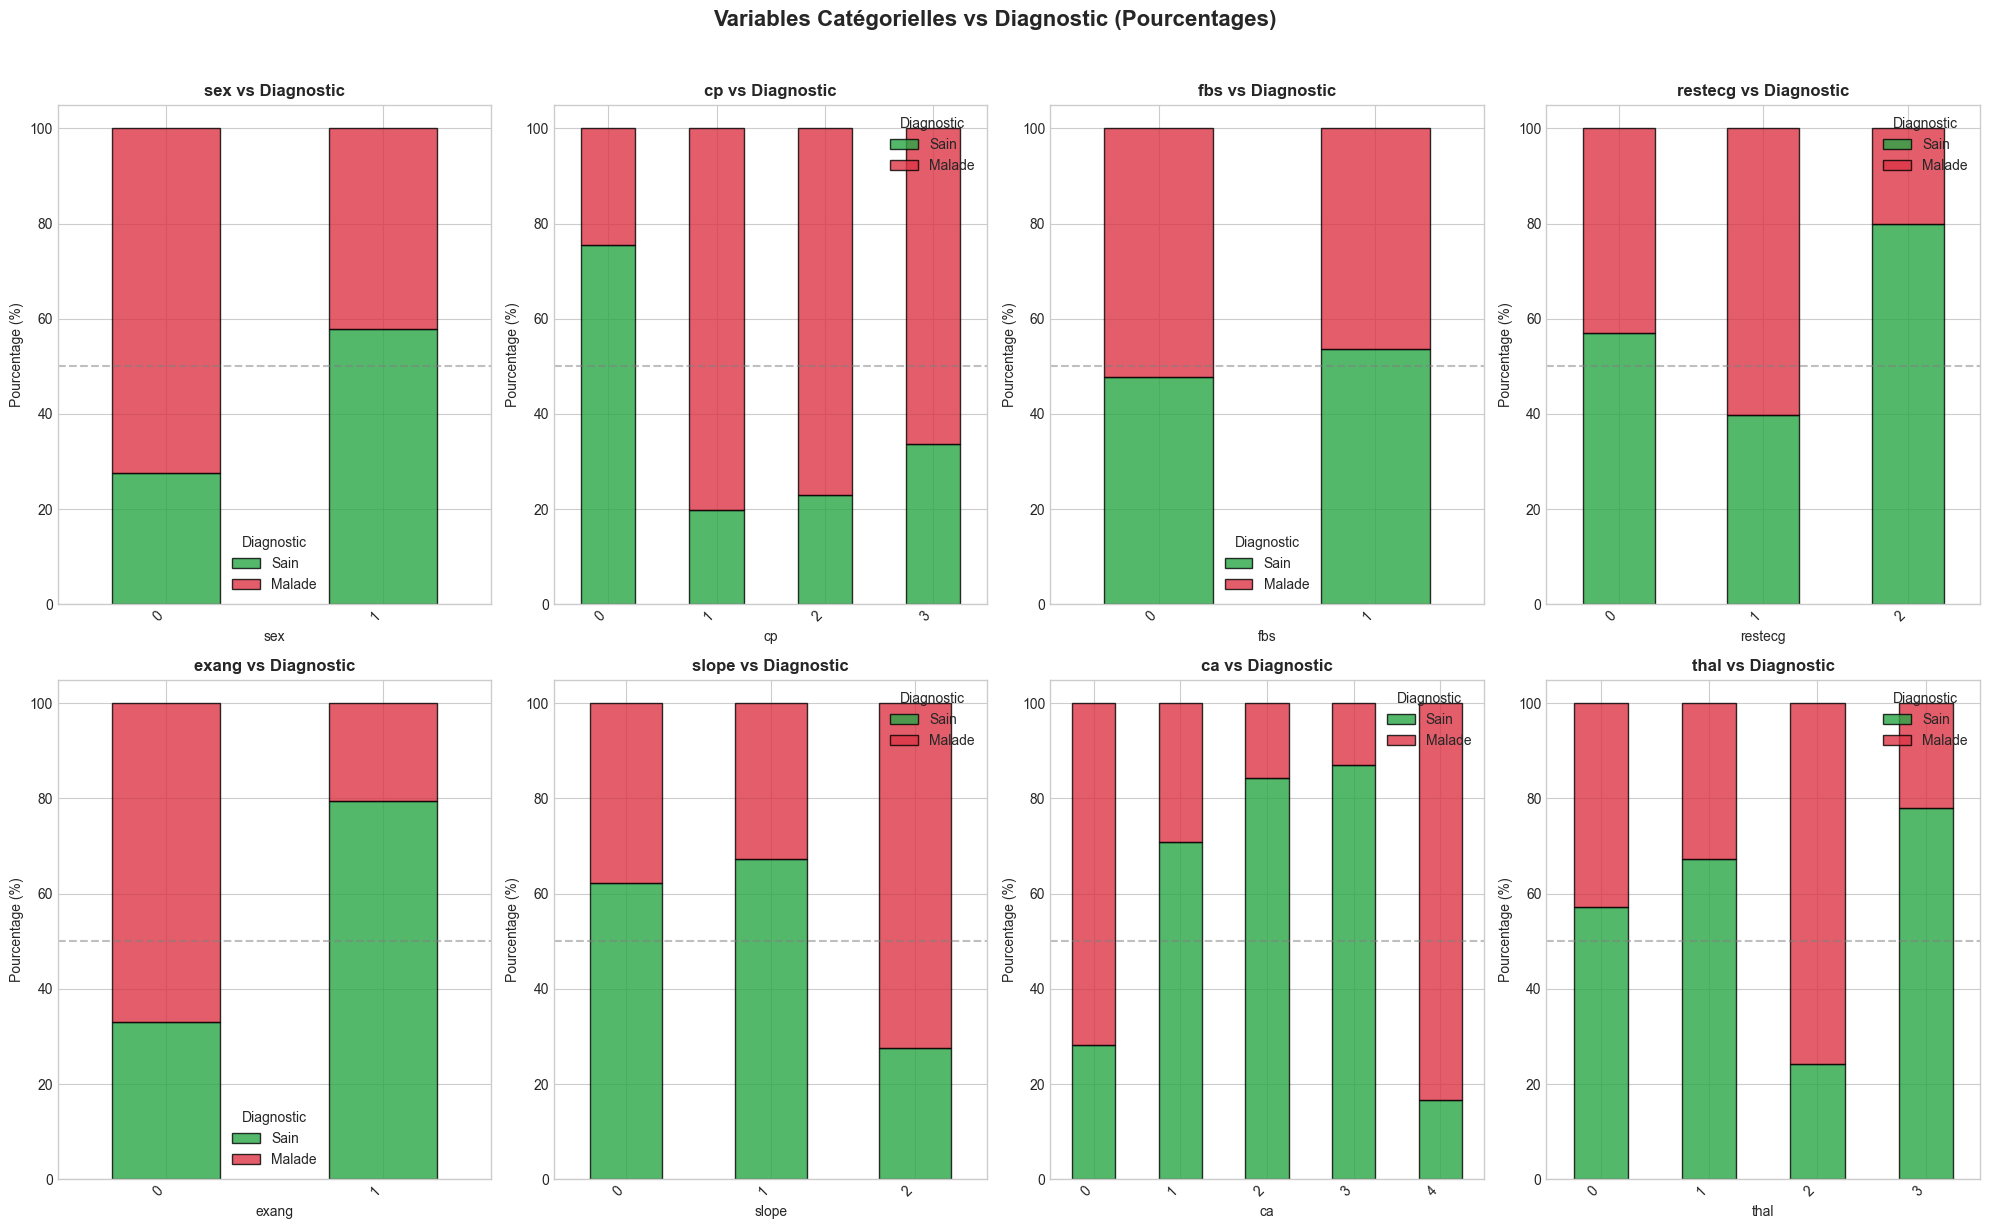

Figure sauvegardée : categorical_by_target.png


In [73]:
# ============================================================================
# VARIABLES CATÉGORIELLES PAR CLASSE
# ============================================================================

fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    
    # Créer un crosstab
    ct = pd.crosstab(df[col], df['target'], normalize='index') * 100
    
    # Stacked bar plot
    ct.plot(kind='bar', stacked=True, ax=ax, color=TARGET_PALETTE, 
            edgecolor='black', alpha=0.8)
    
    ax.set_title(f'{col} vs Diagnostic', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Pourcentage (%)')
    ax.legend(['Sain', 'Malade'], title='Diagnostic')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Ajouter ligne de référence à 50%
    ax.axhline(y=50, color='gray', linestyle='--', alpha=0.5)

plt.suptitle('Variables Catégorielles vs Diagnostic (Pourcentages)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('images/categorical_by_target.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure sauvegardée : categorical_by_target.png")

## 11. Tests Statistiques

In [74]:
# ============================================================================
# TESTS T POUR LES VARIABLES NUMÉRIQUES
# ============================================================================

print("TESTS STATISTIQUES - Variables Numériques")
print("=" * 80)
print("\nTest T de Student (comparaison des moyennes entre les deux groupes)")
print("-" * 80)

ttest_results = []

for col in numerical_cols:
    group_healthy = df[df['target'] == 0][col]
    group_disease = df[df['target'] == 1][col]
    
    # Test T
    t_stat, p_value = stats.ttest_ind(group_healthy, group_disease)
    
    # Interprétation
    if p_value < 0.001:
        significance = '***'
        interpretation = 'Très significatif'
    elif p_value < 0.01:
        significance = '**'
        interpretation = 'Significatif'
    elif p_value < 0.05:
        significance = '*'
        interpretation = 'Significatif'
    else:
        significance = ''
        interpretation = 'Non significatif'
    
    ttest_results.append({
        'Variable': col,
        'Moy. Sain': group_healthy.mean(),
        'Moy. Malade': group_disease.mean(),
        'Différence': group_disease.mean() - group_healthy.mean(),
        'T-statistic': t_stat,
        'P-value': p_value,
        'Sign.': significance,
        'Interprétation': interpretation
    })

ttest_df = pd.DataFrame(ttest_results)
display(ttest_df.round(4))

print("\nLégende : *** p < 0.001, ** p < 0.01, * p < 0.05")

TESTS STATISTIQUES - Variables Numériques

Test T de Student (comparaison des moyennes entre les deux groupes)
--------------------------------------------------------------------------------


,Variable,Moy. Sain,Moy. Malade,Différence,T-statistic,P-value,Sign.,Interprétation
0,age,56.569,52.409,-4.160,7.536,0.000,***,Très significatif
1,trestbps,134.106,129.245,-4.861,4.482,0.000,***,Très significatif
2,chol,251.293,240.979,-10.313,3.213,0.001,**,Significatif
3,thalach,139.130,158.586,19.455,-14.927,0.000,***,Très significatif
4,oldpeak,1.600,0.570,-1.030,15.603,0.000,***,Très significatif



Légende : *** p < 0.001, ** p < 0.01, * p < 0.05


In [75]:
# ============================================================================
# TESTS CHI-DEUX POUR LES VARIABLES CATÉGORIELLES
# ============================================================================

print("\nTESTS STATISTIQUES - Variables Catégorielles")
print("=" * 80)
print("\nTest du Chi-deux (indépendance entre variable et diagnostic)")
print("-" * 80)

chi2_results = []

for col in categorical_cols:
    # Table de contingence
    contingency_table = pd.crosstab(df[col], df['target'])
    
    # Test Chi-deux
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Coefficient de Cramer's V
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0
    
    # Interprétation
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = ''
    
    chi2_results.append({
        'Variable': col,
        'Chi²': chi2,
        'DDL': dof,
        'P-value': p_value,
        "Cramer's V": cramers_v,
        'Sign.': significance,
        'Assoc.': 'Forte' if cramers_v > 0.3 else ('Modérée' if cramers_v > 0.1 else 'Faible')
    })

chi2_df = pd.DataFrame(chi2_results)
chi2_df = chi2_df.sort_values("Cramer's V", ascending=False)
display(chi2_df.round(4))

print("\nLégende : *** p < 0.001, ** p < 0.01, * p < 0.05")
print("Cramer's V : 0-0.1 (faible), 0.1-0.3 (modérée), >0.3 (forte)")


TESTS STATISTIQUES - Variables Catégorielles

Test du Chi-deux (indépendance entre variable et diagnostic)
--------------------------------------------------------------------------------


,Variable,Chi²,DDL,P-value,Cramer's V,Sign.,Assoc.
1,cp,280.982,3,0.000,0.524,***,Forte
7,thal,280.331,3,0.000,0.523,***,Forte
6,ca,257.293,4,0.000,0.501,***,Forte
4,exang,194.815,1,0.000,0.436,***,Forte
5,slope,155.873,2,0.000,0.390,***,Forte
0,sex,78.863,1,0.000,0.277,***,Modérée
3,restecg,35.784,2,0.000,0.187,***,Modérée
2,fbs,1.513,1,0.219,0.038,,Faible



Légende : *** p < 0.001, ** p < 0.01, * p < 0.05
Cramer's V : 0-0.1 (faible), 0.1-0.3 (modérée), >0.3 (forte)


## 12. Analyse Multivariée

Génération du Pairplot (peut prendre quelques secondes)...


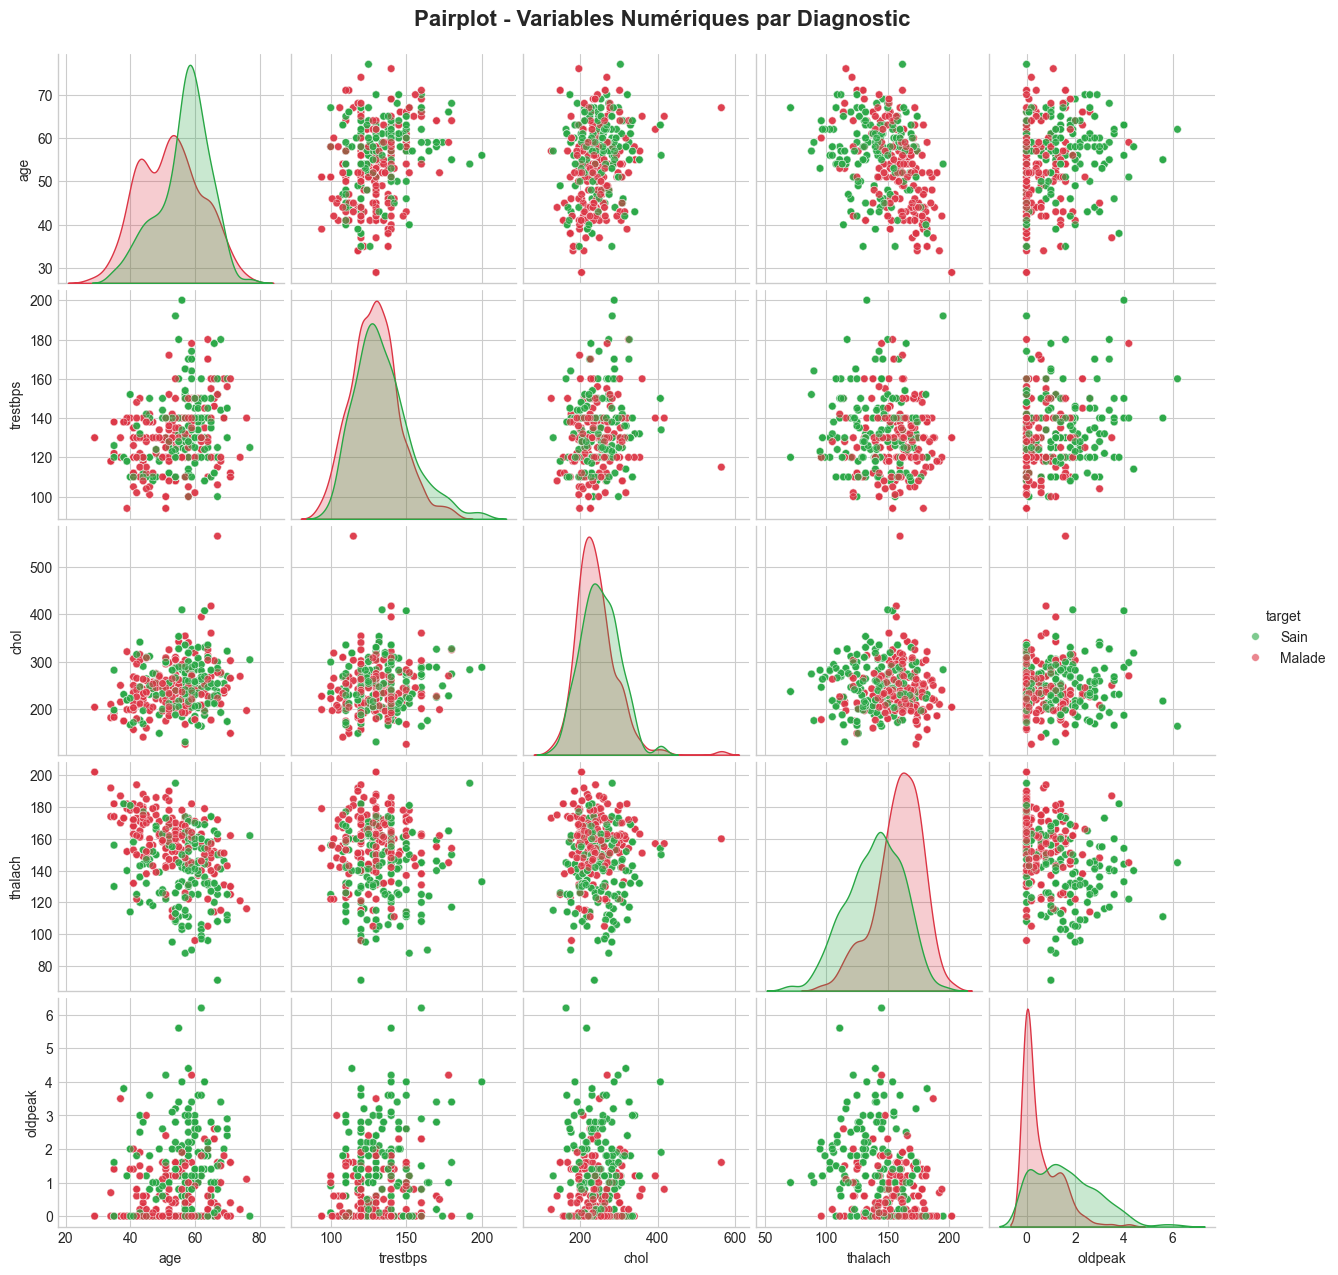

Figure sauvegardée : pairplot.png


In [76]:
# ============================================================================
# PAIRPLOT
# ============================================================================

print("Génération du Pairplot (peut prendre quelques secondes)...")

# Créer le pairplot pour les variables numériques
pairplot_data = df[numerical_cols + ['target']].copy()
pairplot_data['target'] = pairplot_data['target'].map({0: 'Sain', 1: 'Malade'})

g = sns.pairplot(pairplot_data, hue='target', 
                  palette={'Sain': COLORS['healthy'], 'Malade': COLORS['disease']},
                  diag_kind='kde',
                  plot_kws={'alpha': 0.6, 's': 30},
                  height=2.5)

g.fig.suptitle('Pairplot - Variables Numériques par Diagnostic', 
               fontsize=16, fontweight='bold', y=1.02)

plt.savefig('images/pairplot.png', dpi=200, bbox_inches='tight')
plt.show()

print("Figure sauvegardée : pairplot.png")

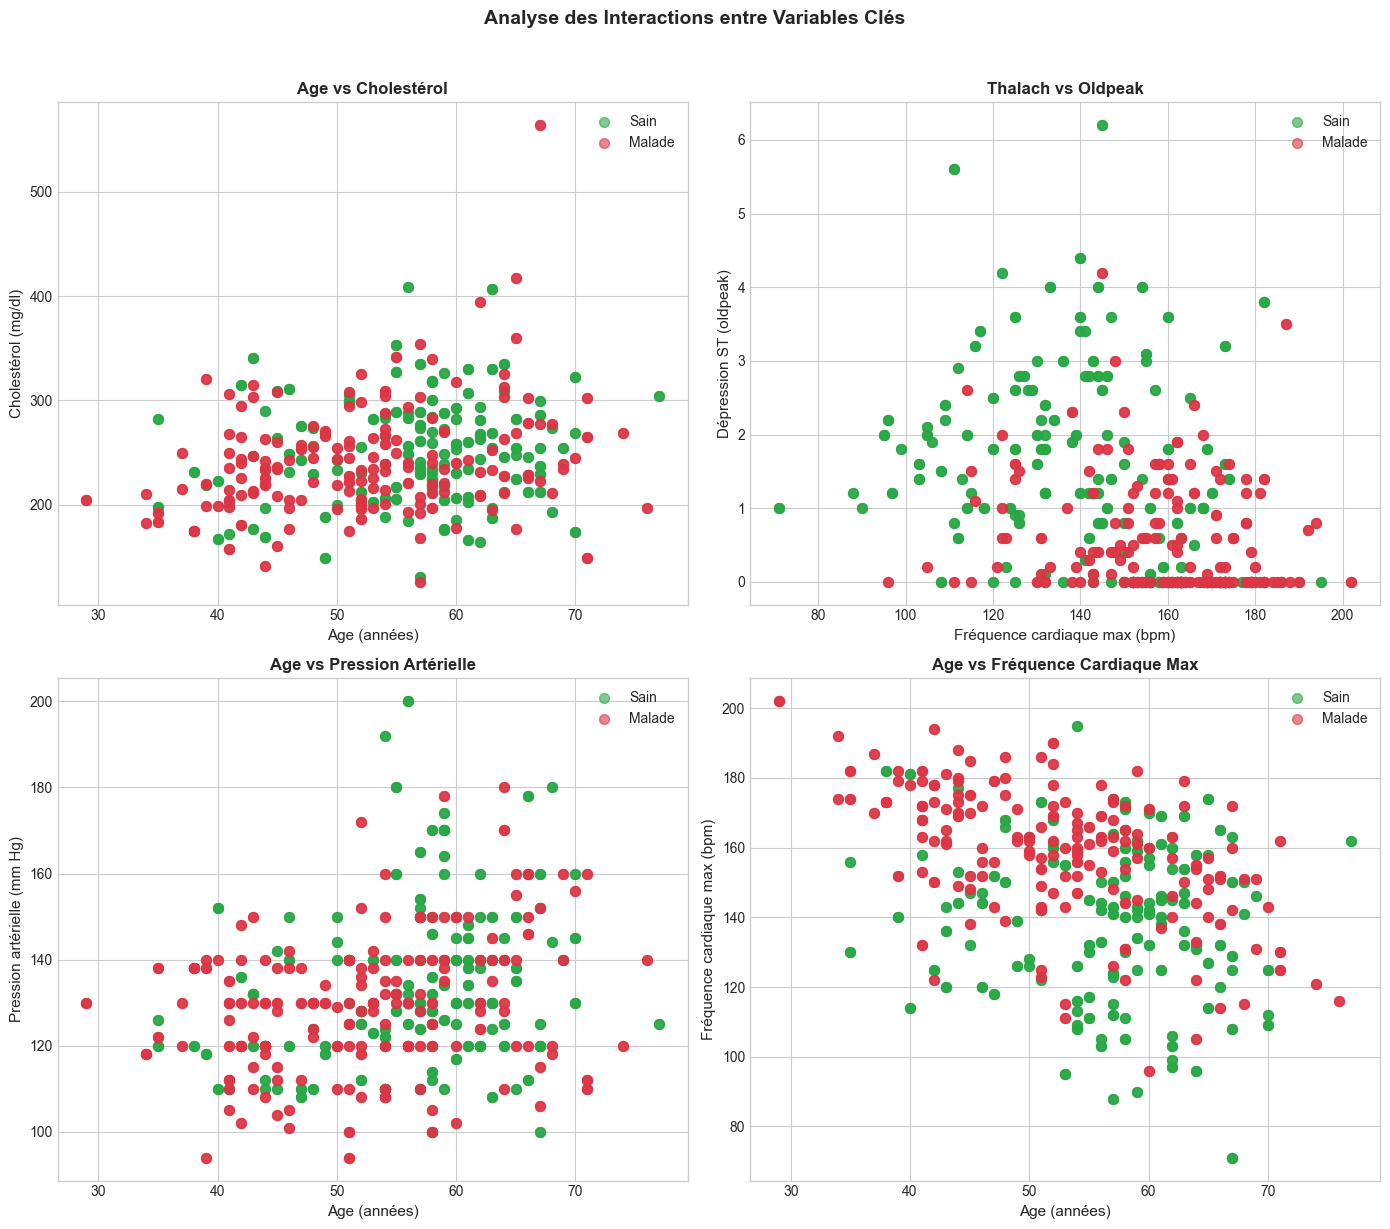

Figure sauvegardée : key_interactions.png


In [77]:
# ============================================================================
# ANALYSE DES INTERACTIONS CLÉS
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Age vs Cholestérol
ax1 = axes[0, 0]
for target_val, color, label in [(0, COLORS['healthy'], 'Sain'), 
                                  (1, COLORS['disease'], 'Malade')]:
    data = df[df['target'] == target_val]
    ax1.scatter(data['age'], data['chol'], c=color, label=label, alpha=0.6, s=50)
ax1.set_xlabel('Age (années)', fontsize=11)
ax1.set_ylabel('Cholestérol (mg/dl)', fontsize=11)
ax1.set_title('Age vs Cholestérol', fontsize=12, fontweight='bold')
ax1.legend()

# 2. Thalach vs Oldpeak
ax2 = axes[0, 1]
for target_val, color, label in [(0, COLORS['healthy'], 'Sain'), 
                                  (1, COLORS['disease'], 'Malade')]:
    data = df[df['target'] == target_val]
    ax2.scatter(data['thalach'], data['oldpeak'], c=color, label=label, alpha=0.6, s=50)
ax2.set_xlabel('Fréquence cardiaque max (bpm)', fontsize=11)
ax2.set_ylabel('Dépression ST (oldpeak)', fontsize=11)
ax2.set_title('Thalach vs Oldpeak', fontsize=12, fontweight='bold')
ax2.legend()

# 3. Age vs Trestbps
ax3 = axes[1, 0]
for target_val, color, label in [(0, COLORS['healthy'], 'Sain'), 
                                  (1, COLORS['disease'], 'Malade')]:
    data = df[df['target'] == target_val]
    ax3.scatter(data['age'], data['trestbps'], c=color, label=label, alpha=0.6, s=50)
ax3.set_xlabel('Age (années)', fontsize=11)
ax3.set_ylabel('Pression artérielle (mm Hg)', fontsize=11)
ax3.set_title('Age vs Pression Artérielle', fontsize=12, fontweight='bold')
ax3.legend()

# 4. Thalach vs Age
ax4 = axes[1, 1]
for target_val, color, label in [(0, COLORS['healthy'], 'Sain'), 
                                  (1, COLORS['disease'], 'Malade')]:
    data = df[df['target'] == target_val]
    ax4.scatter(data['age'], data['thalach'], c=color, label=label, alpha=0.6, s=50)
ax4.set_xlabel('Age (années)', fontsize=11)
ax4.set_ylabel('Fréquence cardiaque max (bpm)', fontsize=11)
ax4.set_title('Age vs Fréquence Cardiaque Max', fontsize=12, fontweight='bold')
ax4.legend()

plt.suptitle('Analyse des Interactions entre Variables Clés', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('images/key_interactions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure sauvegardée : key_interactions.png")

## 13. Analyse Démographique

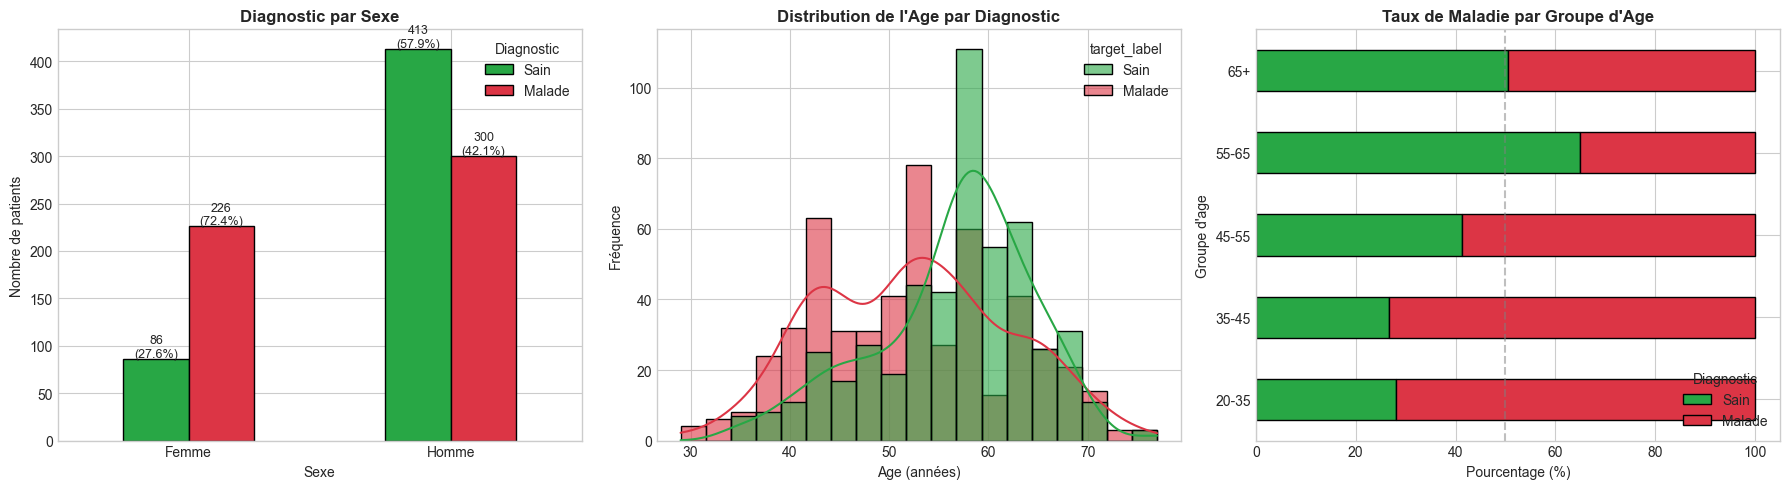

Figure sauvegardée : demographic_analysis.png


In [78]:
# ============================================================================
# ANALYSE PAR SEXE ET AGE
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Distribution par sexe
ax1 = axes[0]
sex_target = pd.crosstab(df['sex'], df['target'])
sex_target.index = ['Femme', 'Homme']
sex_target.columns = ['Sain', 'Malade']
sex_target.plot(kind='bar', ax=ax1, color=TARGET_PALETTE, edgecolor='black')
ax1.set_title('Diagnostic par Sexe', fontsize=12, fontweight='bold')
ax1.set_xlabel('Sexe')
ax1.set_ylabel('Nombre de patients')
ax1.legend(title='Diagnostic')
ax1.tick_params(axis='x', rotation=0)

# Ajouter les pourcentages
for i, (idx, row) in enumerate(sex_target.iterrows()):
    total = row.sum()
    for j, val in enumerate(row):
        ax1.annotate(f'{val}\n({val/total*100:.1f}%)', 
                     xy=(i + (j-0.5)*0.25, val + 2),
                     ha='center', fontsize=9)

# 2. Distribution de l'âge par diagnostic
ax2 = axes[1]
df['target_label'] = df['target'].map({0: 'Sain', 1: 'Malade'})
sns.histplot(data=df, x='age', hue='target_label', ax=ax2, 
             palette={'Sain': COLORS['healthy'], 'Malade': COLORS['disease']},
             kde=True, alpha=0.6)
ax2.set_title('Distribution de l\'Age par Diagnostic', fontsize=12, fontweight='bold')
ax2.set_xlabel('Age (années)')
ax2.set_ylabel('Fréquence')

# 3. Pyramide des âges
ax3 = axes[2]
df['age_group'] = pd.cut(df['age'], bins=[20, 35, 45, 55, 65, 80], 
                         labels=['20-35', '35-45', '45-55', '55-65', '65+'])
age_disease = pd.crosstab(df['age_group'], df['target'], normalize='index') * 100
age_disease.columns = ['Sain', 'Malade']
age_disease.plot(kind='barh', stacked=True, ax=ax3, color=TARGET_PALETTE, edgecolor='black')
ax3.set_title('Taux de Maladie par Groupe d\'Age', fontsize=12, fontweight='bold')
ax3.set_xlabel('Pourcentage (%)')
ax3.set_ylabel('Groupe d\'age')
ax3.legend(title='Diagnostic', loc='lower right')
ax3.axvline(x=50, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('images/demographic_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Nettoyer les colonnes temporaires
df.drop(['target_label', 'age_group'], axis=1, inplace=True)

print("Figure sauvegardée : demographic_analysis.png")

In [79]:
# ============================================================================
# STATISTIQUES DÉMOGRAPHIQUES
# ============================================================================

print("STATISTIQUES DÉMOGRAPHIQUES")
print("=" * 80)

# Par sexe
print("\nRépartition par sexe :")
sex_stats = df.groupby('sex')['target'].agg(['count', 'sum', 'mean'])
sex_stats.index = ['Femme', 'Homme']
sex_stats.columns = ['Total', 'Malades', 'Taux maladie (%)']
sex_stats['Taux maladie (%)'] = (sex_stats['Taux maladie (%)'] * 100).round(1)
display(sex_stats)

# Par groupe d'âge
print("\nRépartition par groupe d'âge :")
df['age_group'] = pd.cut(df['age'], bins=[20, 35, 45, 55, 65, 80], 
                         labels=['20-35', '35-45', '45-55', '55-65', '65+'])
age_stats = df.groupby('age_group')['target'].agg(['count', 'sum', 'mean'])
age_stats.columns = ['Total', 'Malades', 'Taux maladie (%)']
age_stats['Taux maladie (%)'] = (age_stats['Taux maladie (%)'] * 100).round(1)
display(age_stats)

df.drop('age_group', axis=1, inplace=True)

STATISTIQUES DÉMOGRAPHIQUES

Répartition par sexe :


,Total,Malades,Taux maladie (%)
Femme,312,226,72.400
Homme,713,300,42.100



Répartition par groupe d'âge :


,Total,Malades,Taux maladie (%)
age_group,,,
20-35,25,18,72.000
35-45,188,138,73.400
45-55,293,172,58.700
55-65,408,143,35.000
65+,111,55,49.500


## 14. Résumé des Découvertes Clés

In [80]:
# ============================================================================
# TABLEAU DE SYNTHÈSE
# ============================================================================

print("="*80)
print("                    RÉSUMÉ DE L'ANALYSE EXPLORATOIRE")
print("="*80)

summary = """
1. STRUCTURE DES DONNÉES
   - {n_obs} observations (patients)
   - {n_vars} variables (13 features + 1 target)
   - Aucune valeur manquante
   - Types : {n_num} variables numériques, {n_cat} variables catégorielles

2. VARIABLE CIBLE
   - Classes relativement équilibrées (ratio ~{ratio:.2f})
   - {n_healthy} patients sains ({pct_healthy:.1f}%)
   - {n_disease} patients malades ({pct_disease:.1f}%)

3. VARIABLES LES PLUS CORRÉLÉES AVEC LA MALADIE
   - cp (douleur thoracique) : corr = {corr_cp:.3f}
   - thalach (fréq. cardiaque max) : corr = {corr_thalach:.3f}
   - exang (angine à l'effort) : corr = {corr_exang:.3f}
   - oldpeak (dépression ST) : corr = {corr_oldpeak:.3f}
   - ca (vaisseaux colorés) : corr = {corr_ca:.3f}

4. OUTLIERS DÉTECTÉS
   - chol : quelques valeurs élevées (>400 mg/dl)
   - trestbps : quelques valeurs extrêmes
   - oldpeak : distribution asymétrique

5. OBSERVATIONS DÉMOGRAPHIQUES
   - Plus d'hommes ({n_male}) que de femmes ({n_female})
   - Age moyen : {mean_age:.1f} ans
   - Les hommes ont un taux de maladie plus faible dans ce dataset

6. RECOMMANDATIONS POUR LE PRÉTRAITEMENT
   - Standardiser les variables numériques (StandardScaler)
   - Encoder les variables catégorielles si nécessaire
   - Considérer le traitement des outliers pour chol et trestbps
   - Features importantes à conserver : cp, thalach, exang, oldpeak, ca, thal
""".format(
    n_obs=len(df),
    n_vars=len(df.columns),
    n_num=len(numerical_cols),
    n_cat=len(categorical_cols),
    ratio=df['target'].value_counts().min() / df['target'].value_counts().max(),
    n_healthy=(df['target'] == 0).sum(),
    pct_healthy=(df['target'] == 0).mean() * 100,
    n_disease=(df['target'] == 1).sum(),
    pct_disease=(df['target'] == 1).mean() * 100,
    corr_cp=correlation_matrix.loc['cp', 'target'],
    corr_thalach=correlation_matrix.loc['thalach', 'target'],
    corr_exang=correlation_matrix.loc['exang', 'target'],
    corr_oldpeak=correlation_matrix.loc['oldpeak', 'target'],
    corr_ca=correlation_matrix.loc['ca', 'target'],
    n_male=(df['sex'] == 1).sum(),
    n_female=(df['sex'] == 0).sum(),
    mean_age=df['age'].mean()
)

print(summary)

                    RÉSUMÉ DE L'ANALYSE EXPLORATOIRE

1. STRUCTURE DES DONNÉES
   - 1025 observations (patients)
   - 14 variables (13 features + 1 target)
   - Aucune valeur manquante
   - Types : 5 variables numériques, 8 variables catégorielles

2. VARIABLE CIBLE
   - Classes relativement équilibrées (ratio ~0.95)
   - 499 patients sains (48.7%)
   - 526 patients malades (51.3%)

3. VARIABLES LES PLUS CORRÉLÉES AVEC LA MALADIE
   - cp (douleur thoracique) : corr = 0.435
   - thalach (fréq. cardiaque max) : corr = 0.423
   - exang (angine à l'effort) : corr = -0.438
   - oldpeak (dépression ST) : corr = -0.438
   - ca (vaisseaux colorés) : corr = -0.382

4. OUTLIERS DÉTECTÉS
   - chol : quelques valeurs élevées (>400 mg/dl)
   - trestbps : quelques valeurs extrêmes
   - oldpeak : distribution asymétrique

5. OBSERVATIONS DÉMOGRAPHIQUES
   - Plus d'hommes (713) que de femmes (312)
   - Age moyen : 54.4 ans
   - Les hommes ont un taux de maladie plus faible dans ce dataset

6. RECOMMAN

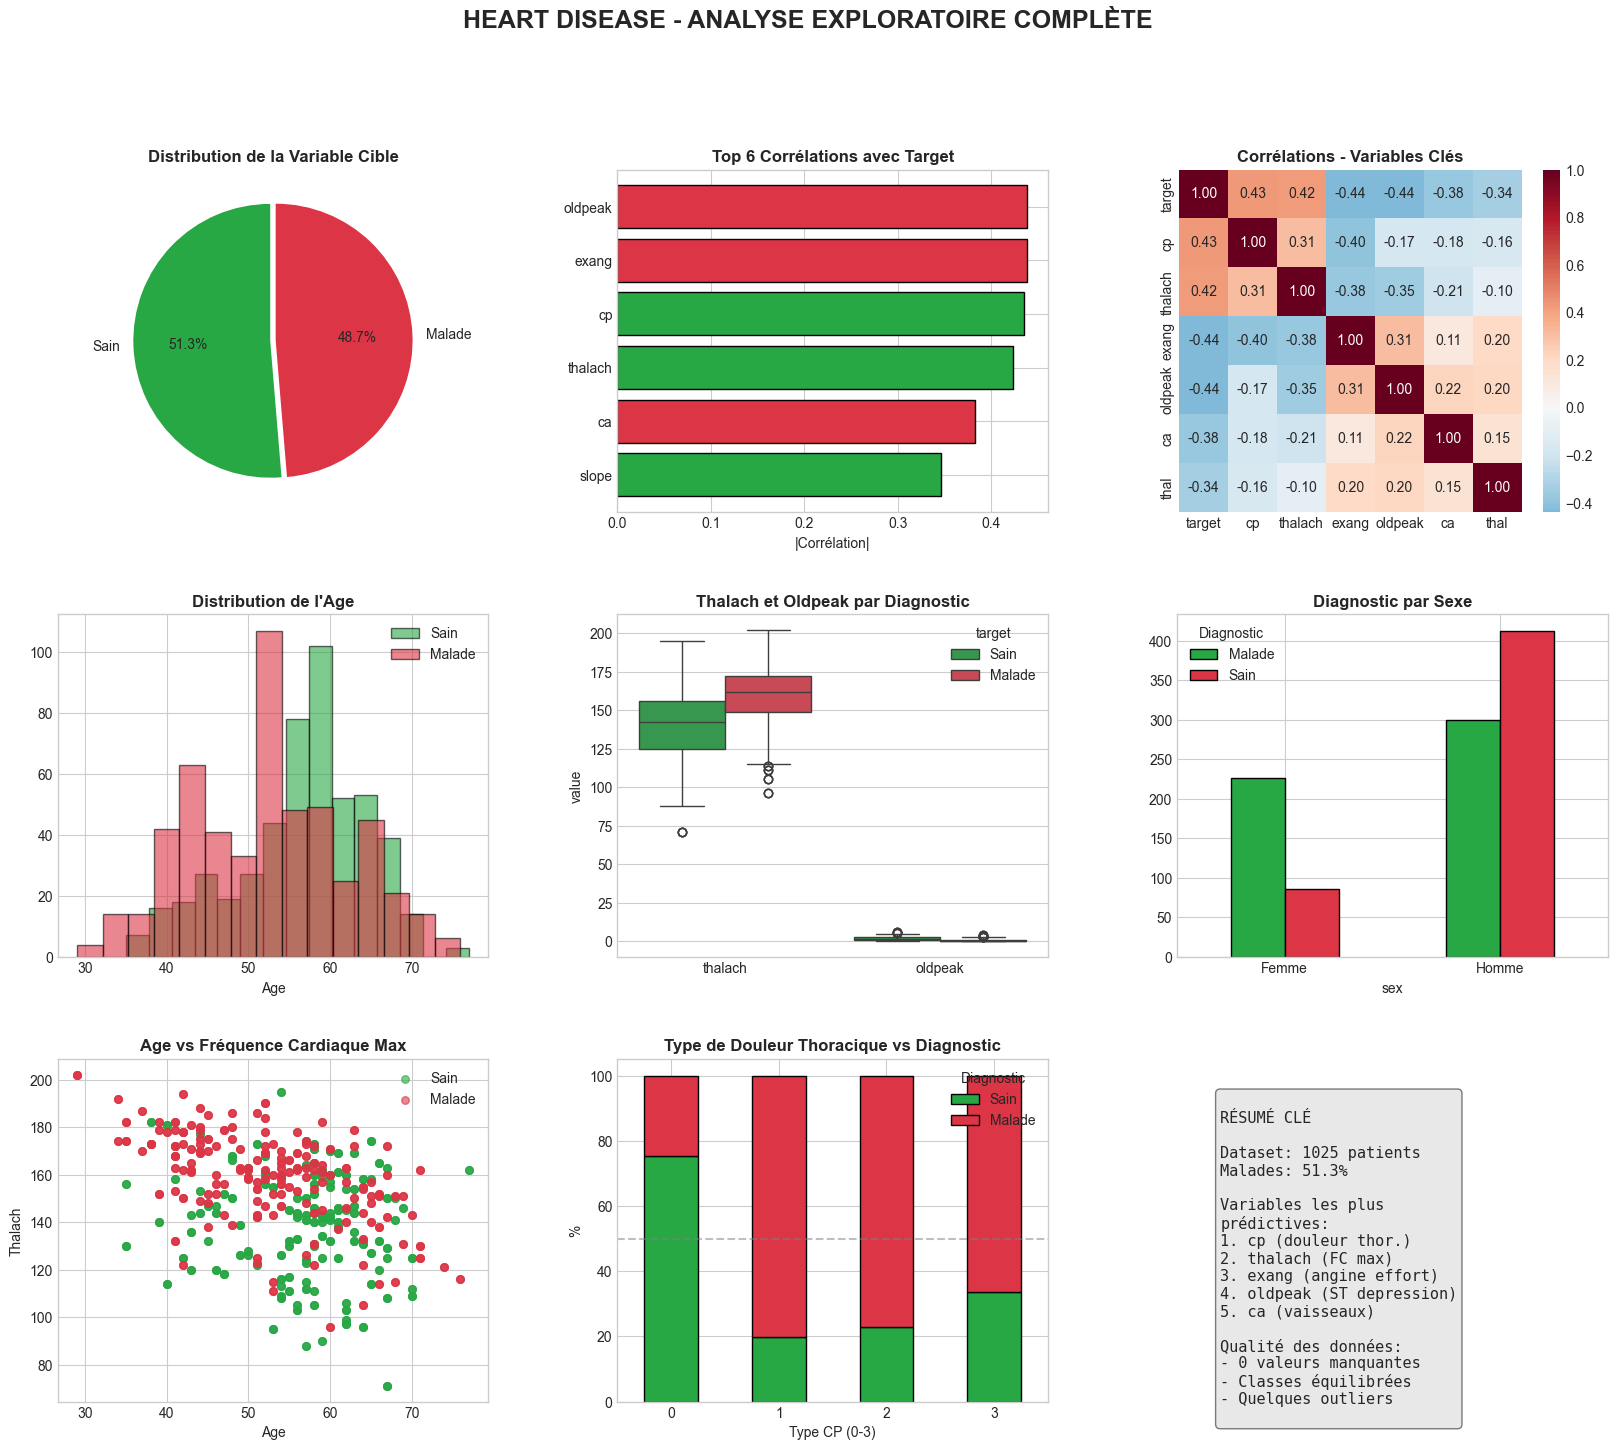

Figure de synthèse sauvegardée : eda_summary_dashboard.png


In [81]:
# ============================================================================
# FIGURE DE SYNTHÈSE FINALE
# ============================================================================

fig = plt.figure(figsize=(20, 16))

# Grille de sous-graphiques
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Distribution de la cible (haut gauche)
ax1 = fig.add_subplot(gs[0, 0])
target_counts = df['target'].value_counts()
ax1.pie(target_counts.values, labels=['Sain', 'Malade'], colors=TARGET_PALETTE,
        autopct='%1.1f%%', startangle=90, explode=(0.02, 0.02))
ax1.set_title('Distribution de la Variable Cible', fontweight='bold')

# 2. Top corrélations (haut centre)
ax2 = fig.add_subplot(gs[0, 1])
top_corr = correlation_matrix['target'].drop('target').abs().sort_values(ascending=True).tail(6)
colors = [COLORS['success'] if correlation_matrix.loc[var, 'target'] > 0 else COLORS['danger'] 
          for var in top_corr.index]
ax2.barh(top_corr.index, top_corr.values, color=colors, edgecolor='black')
ax2.set_title('Top 6 Corrélations avec Target', fontweight='bold')
ax2.set_xlabel('|Corrélation|')

# 3. Matrice de corrélation réduite (haut droite)
ax3 = fig.add_subplot(gs[0, 2])
top_vars = ['target', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
sns.heatmap(df[top_vars].corr(), annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, ax=ax3, square=True)
ax3.set_title('Corrélations - Variables Clés', fontweight='bold')

# 4. Distribution age (milieu gauche)
ax4 = fig.add_subplot(gs[1, 0])
for target_val, color, label in [(0, COLORS['healthy'], 'Sain'), 
                                  (1, COLORS['disease'], 'Malade')]:
    data = df[df['target'] == target_val]['age']
    ax4.hist(data, bins=15, alpha=0.6, color=color, label=label, edgecolor='black')
ax4.set_title('Distribution de l\'Age', fontweight='bold')
ax4.set_xlabel('Age')
ax4.legend()

# 5. Boxplots variables clés (milieu centre)
ax5 = fig.add_subplot(gs[1, 1])
df_melted = df[['thalach', 'oldpeak', 'target']].melt(id_vars='target')
df_melted['target'] = df_melted['target'].map({0: 'Sain', 1: 'Malade'})
sns.boxplot(data=df_melted, x='variable', y='value', hue='target', 
            palette={'Sain': COLORS['healthy'], 'Malade': COLORS['disease']}, ax=ax5)
ax5.set_title('Thalach et Oldpeak par Diagnostic', fontweight='bold')
ax5.set_xlabel('')

# 6. Sexe vs Diagnostic (milieu droite)
ax6 = fig.add_subplot(gs[1, 2])
sex_target = pd.crosstab(df['sex'].map({0: 'Femme', 1: 'Homme'}), 
                          df['target'].map({0: 'Sain', 1: 'Malade'}))
sex_target.plot(kind='bar', ax=ax6, color=TARGET_PALETTE, edgecolor='black')
ax6.set_title('Diagnostic par Sexe', fontweight='bold')
ax6.tick_params(axis='x', rotation=0)
ax6.legend(title='Diagnostic')

# 7. Scatter age vs thalach (bas gauche)
ax7 = fig.add_subplot(gs[2, 0])
for target_val, color, label in [(0, COLORS['healthy'], 'Sain'), 
                                  (1, COLORS['disease'], 'Malade')]:
    data = df[df['target'] == target_val]
    ax7.scatter(data['age'], data['thalach'], c=color, label=label, alpha=0.6, s=30)
ax7.set_title('Age vs Fréquence Cardiaque Max', fontweight='bold')
ax7.set_xlabel('Age')
ax7.set_ylabel('Thalach')
ax7.legend()

# 8. CP distribution (bas centre)
ax8 = fig.add_subplot(gs[2, 1])
cp_target = pd.crosstab(df['cp'], df['target'], normalize='index') * 100
cp_target.columns = ['Sain', 'Malade']
cp_target.plot(kind='bar', stacked=True, ax=ax8, color=TARGET_PALETTE, edgecolor='black')
ax8.set_title('Type de Douleur Thoracique vs Diagnostic', fontweight='bold')
ax8.set_xlabel('Type CP (0-3)')
ax8.set_ylabel('%')
ax8.tick_params(axis='x', rotation=0)
ax8.legend(title='Diagnostic')
ax8.axhline(y=50, color='gray', linestyle='--', alpha=0.5)

# 9. Résumé texte (bas droite)
ax9 = fig.add_subplot(gs[2, 2])
ax9.axis('off')
summary_text = """
RÉSUMÉ CLÉ

Dataset: {n} patients
Malades: {disease:.1f}%

Variables les plus
prédictives:
1. cp (douleur thor.)
2. thalach (FC max)
3. exang (angine effort)
4. oldpeak (ST depression)
5. ca (vaisseaux)

Qualité des données:
- 0 valeurs manquantes
- Classes équilibrées
- Quelques outliers
""".format(n=len(df), disease=(df['target']==1).mean()*100)
ax9.text(0.1, 0.9, summary_text, transform=ax9.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))

plt.suptitle('HEART DISEASE - ANALYSE EXPLORATOIRE COMPLÈTE', 
             fontsize=18, fontweight='bold', y=0.98)

plt.savefig('images/eda_summary_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure de synthèse sauvegardée : eda_summary_dashboard.png")

## 15. Sauvegarde des Données Préparées

In [82]:
# ============================================================================
# SAUVEGARDE DES DONNÉES
# ============================================================================

# Sauvegarder le dataset original (copie de travail)
df.to_csv('heart_clean.csv', index=False)
print("Dataset sauvegardé : heart_clean.csv")

# Sauvegarder les statistiques descriptives
desc_stats.to_csv('descriptive_statistics.csv')
print("Statistiques sauvegardées : descriptive_statistics.csv")

# Sauvegarder la matrice de corrélation
correlation_matrix.to_csv('correlation_matrix.csv')
print("Matrice de corrélation sauvegardée : correlation_matrix.csv")

print("\n" + "="*80)
print("ANALYSE EXPLORATOIRE TERMINÉE AVEC SUCCÈS !")
print("="*80)
print("\nFichiers générés :")
print("- 10 figures PNG (visualisations)")
print("- 3 fichiers CSV (données et statistiques)")
print("\nProchaine étape : Notebook 02 - Feature Engineering")

Dataset sauvegardé : heart_clean.csv
Statistiques sauvegardées : descriptive_statistics.csv
Matrice de corrélation sauvegardée : correlation_matrix.csv

ANALYSE EXPLORATOIRE TERMINÉE AVEC SUCCÈS !

Fichiers générés :
- 10 figures PNG (visualisations)
- 3 fichiers CSV (données et statistiques)

Prochaine étape : Notebook 02 - Feature Engineering
